# Credit Risk Analysis Using Exploratory Data Analysis (EDA)

## Problem Statement:
The goal of this analysis is to identify patterns that indicate if a client has difficulty paying their installments, supporting loan approval decisions, and minimizing default risk.

## Key Objectives:
1. Preprocess the data to handle missing values and outliers.
2. Analyze the target variable for data imbalance.
3. Perform univariate, segmented univariate, and bivariate analysis.
4. Identify top correlations for defaulters and non-defaulters.
5. Generate insights that differentiate clients with payment difficulties.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

**Read and clean dataset application_data.csv**

## Load Dataset
I will load the `application_data` and `previous_application` datasets. These datasets will be used for exploratory analysis.


In [2]:
# Load the files into dataframes
application_data = pd.read_csv('application_data.csv')

# Display the first few rows of each dataset to understand data structure
application_data_head = application_data.head(1000)
pd.set_option("display.max_columns", None)
application_data_info = application_data.info(verbose=True)

(application_data_head)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [3]:
# Check for duplicates
print("Number of duplicate rows in application data:", application_data.duplicated().sum())

Number of duplicate rows in application data: 0


**Handling Missing Data dataset application_data.csv**

In [4]:
# Identify columns with missing values
print("\nMissing Values in Application Data:")
print(application_data.isnull().sum())

# Analyze the percentage of missing values in each column
print("\nPercentage of Missing Values in Application Data:")
print(application_data.isnull().mean() * 100)


Missing Values in Application Data:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Percentage of Missing Values in Application Data:
SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64


In [5]:
# Replace all XNA & XAP with NaN, since they are missing values,
# to get a better understanding of the total missing values:
application_data.replace("XNA", np.nan, inplace=True)
application_data.replace("XAP", np.nan, inplace=True)
# Observed that 365243 days is an error too, since when it means 1000 years, which isn't possible.
application_data.DAYS_EMPLOYED.replace(365243, np.nan, inplace=True)

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

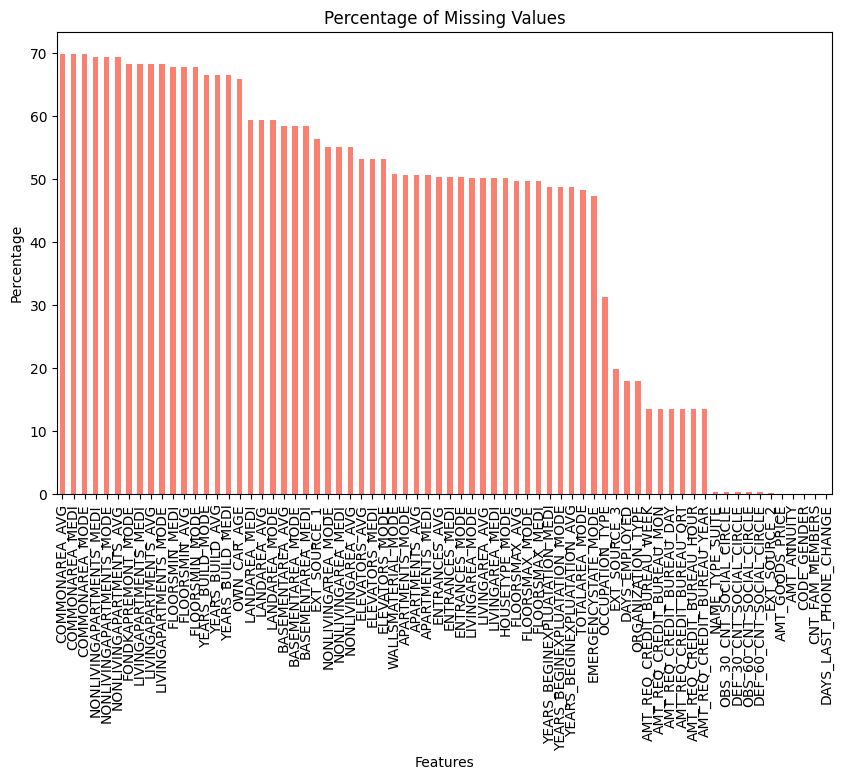

Columns dropped: ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EM

In [6]:

# Missing Value Analysis
missing_values = application_data.isnull().sum() / len(application_data) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
# Visualize missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='salmon')
plt.title('Percentage of Missing Values')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()

# Handle missing values (example strategy: dropping columns with > 40% missing)
columns_to_drop = missing_values[missing_values > 40].index
application_data_cleaned = application_data.drop(columns=columns_to_drop, axis=1)
print(f"Columns dropped: {columns_to_drop.tolist()}")


In [7]:
# Approach for handling missing values
# For columns with low percentage of missing values, impute with median or mode
# For columns with high percentage of missing values, consider removing the columns

# Impute missing values with median for numeric columns
application_data_numeric = application_data.select_dtypes(include=['float64', 'int64'])
application_data_numeric = application_data_numeric.fillna(application_data_numeric.median())

# Impute missing values with mode for categorical columns
application_data_categorical = application_data.select_dtypes(include=['object'])
application_data_categorical = application_data_categorical.fillna(application_data_categorical.mode().iloc[0])

# Combine the imputed numeric and categorical columns
application_data = pd.concat([application_data_numeric, application_data_categorical], axis=1)

In [8]:
application_data.head(1000)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,9.0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,9.0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.0840,0.0746,0.9816,0.7648,0.0190,0.0000,0.1379,0.1667,0.2083,0.0458,0.0771,0.0731,0.0000,0.0011,0.0864,0.0758,0.9816,0.7585,0.0208,0

**Read and clean dataset previous_application.csv**

In [9]:
# Load the files into dataframes
previous_application = pd.read_csv('previous_application.csv')

# Display the first few rows of each dataset to understand data structure
previous_application_head = previous_application.head(1000)

previous_application_info = previous_application.info(verbose=True)

(previous_application_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2712145,178541,Consumer loans,7397.775,133186.5,161316.0,0.0,133186.5,WEDNESDAY,18,Y,1,0.000000,NaN,NaN,XAP,Approved,-171,Cash through the bank,XAP,Unaccompanied,Repeater,Computers,POS,XNA,Country-wide,1350,Consumer electronics,24.0,low_action,POS household without interest,365243.0,-141.0,549.0,365243.0,365243.0,1.0
996,2224419,200094,Consumer loans,12321.945,104382.0,102208.5,10440.0,104382.0,FRIDAY,13,Y,1,0.100934,NaN,NaN,XAP,Approved,-1037,Cash through the bank,XAP,Children,Repeater,Computers,POS,XNA,Country-wide,1350,Consumer electronics,10.0,middle,POS household with interest,365243.0,-1006.0,-736.0,-736.0,-705.0,0.0
997,1076320,431394,Consumer loans,11535.570,121032.0,123507.0,0.0,121032.0,TUESDAY,18,Y,1,0.000000,NaN,NaN,XAP,Approved,-1053,Cash through the bank,XAP,Unaccompanied,Repeater,Computers,POS,XNA,Country-wide,1350,Consumer electronics,12.0,low_normal,POS household with interest,365243.0,-1022.0,-692.0,-692.0,-655.0,0.0
998,1958865,117651,Consumer loans,16739.055,89995.5,94747.5,0.0,89995.5,FRIDAY,15,Y,1,0.000000,NaN,NaN,XAP,Approved,-339,Cash through the bank,XAP,Unaccompanied,Repeater,Consumer Electronics,POS,XNA,Regional / Local,140,Consumer electronics,6.0,low_normal,POS household with interest,365243.0,-309.0,-159.0,-159.0,-155.0,1.0


In [10]:
# Check for duplicates
print("Number of duplicate rows in previous application data:", previous_application.duplicated().sum())

Number of duplicate rows in previous application data: 0


**Handling Missing Data dataset previous_application.csv**

In [11]:
# Replace all XNA & XAP with NaN, since they are missing values to get a better understanding of the total missing values:
previous_application.replace("XNA", np.nan, inplace=True)
previous_application.replace("XAP", np.nan, inplace=True)

previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,NaN,Approved,-73,Cash through the bank,NaN,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,-164,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,-301,Cash through the bank,NaN,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,NaN,Approved,-512,Cash through the bank,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Identify columns with missing values
print("\nMissing Values in Application Data:")
print(previous_application.isnull().sum())

# Analyze the percentage of missing values in each column
print("\nPercentage of Missing Values in Application Data:")
print(previous_application.isnull().mean() * 100)


Missing Values in Application Data:
SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                 346
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE         1600579
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE               627384
CODE_REJECT_REASON             1358337
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                  1941
NAME_GOODS_CATEGORY             950809
NAME_PORTFOLIO                  372230
NAME_PRODUCT_TYPE          

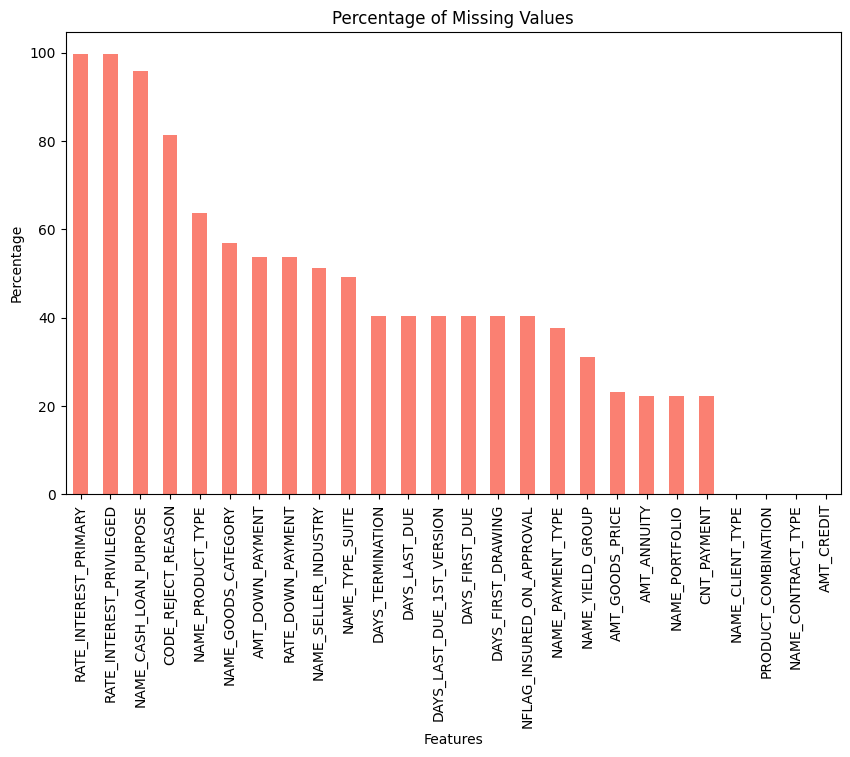

Columns dropped: ['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON', 'NAME_PRODUCT_TYPE', 'NAME_GOODS_CATEGORY', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'NAME_SELLER_INDUSTRY', 'NAME_TYPE_SUITE', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'NFLAG_INSURED_ON_APPROVAL']


In [13]:

# Missing Value Analysis
missing_values = previous_application.isnull().sum() / len(previous_application) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
# Visualize missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='salmon')
plt.title('Percentage of Missing Values')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()

# Handle missing values (example strategy: dropping columns with > 40% missing)
columns_to_drop = missing_values[missing_values > 40].index
previous_application_cleaned = previous_application.drop(columns=columns_to_drop, axis=1)
print(f"Columns dropped: {columns_to_drop.tolist()}")


In [14]:
# Approach for handling missing values
# For columns with low percentage of missing values, impute with median or mode
# For columns with high percentage of missing values, consider removing the columns

# Impute missing values with median for numeric columns
previous_application_numeric = previous_application.select_dtypes(include=['float64', 'int64'])
previous_application_numeric = previous_application_numeric.fillna(previous_application_numeric.median())

# Impute missing values with mode for categorical columns
previous_application_categorical = previous_application.select_dtypes(include=['object'])
previous_application_categorical = previous_application_categorical.fillna(previous_application_categorical.mode().iloc[0])

# Combine the imputed numeric and categorical columns
previous_application = pd.concat([previous_application_numeric, previous_application_categorical], axis=1)

In [15]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.000000,0.182832,0.867336,-73,35,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0,Consumer loans,SATURDAY,Y,Repairs,Approved,Cash through the bank,HC,Unaccompanied,Repeater,Mobile,POS,x-sell,Country-wide,Connectivity,middle,POS mobile with interest
1,2802425,108129,25188.615,607500.0,679671.0,1638.0,607500.0,11,1,0.051605,0.189122,0.835095,-164,-1,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0,Cash loans,THURSDAY,Y,Repairs,Approved,Cash through the bank,HC,Unaccompanied,Repeater,Mobile,Cash,x-sell,Contact center,Consumer electronics,low_action,Cash X-Sell: low
2,2523466,122040,15060.735,112500.0,136444.5,1638.0,112500.0,11,1,0.051605,0.189122,0.835095,-301,-1,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0,Cash loans,TUESDAY,Y,Repairs,Approved,Cash through the bank,HC,"Spouse, partner",Repeater,Mobile,Cash,x-sell,Credit and cash offices,Consumer electronics,high,Cash X-Sell: high
3,2819243,176158,47041.335,450000.0,470790.0,1638.0,450000.0,7,1,0.051605,0.189122,0.835095,-512,-1,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,Cash loans,MONDAY,Y,Repairs,Approved,Cash through the bank,HC,Unaccompanied,Repeater,Mobile,Cash,x-sell,Credit and cash offices,Consumer electronics,middle,Cash X-Sell: middle
4,1784265,202054,31924.395,337500.0,404055.0,1638.0,337500.0,9,1,0.051605,0.189122,0.835095,-781,-1,24.0,365243.0,-831.0,-361.0,-537.0,-499.0,0.0,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,Unaccompanied,Repeater,Mobile,Cash,walk-in,Credit and cash offices,Consumer electronics,high,Cash Street: high


In [16]:
print(application_data.isnull().sum().sum())
print(previous_application.isnull().sum().sum())

0
0


In [17]:
# Drop irrelevant columns:
# Sum up total documents submitted in a new column and remove the old ones:
application_data["TOTAL_DOCS"] = application_data.loc[:,"FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"].sum(axis=1)
application_data.drop(application_data.loc[:,"FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"].columns,axis=1, inplace=True)

## New column of total unquiries made to Credit Bureau upto 1 year before application -
## add all the "AMT_REQ_CREDIT_BUREAU" columns and delete all the columns used
application_data["TOTAL_CREDIT_BUREAU_ENQ"] = application_data.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"].sum(axis=1)
application_data.drop(application_data.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"].columns, axis=1, inplace=True)

application_data.drop("HOUR_APPR_PROCESS_START", axis=1, inplace=True)

In [18]:
flag = list(application_data.columns[application_data.columns.str.contains("FLAG")])

def change(x):
    for c in flag:
        application_data.loc[:,c].replace((0,1), ("N", "Y"), inplace=True)
    return application_data

change(flag)
application_data.shape

(307511, 97)

## CreditRiskEDA Class
I initialize the `CreditRiskEDA` class to manage and structure my analysis. The class includes methods for:
1. Preprocessing application and previous application data.
2. Handling missing values.
3. Outlier analysis.
4. Target variable analysis.
5. Univariate and bivariate feature analysis.
6. Correlation analysis.


In [19]:
class CreditRiskEDA:
    def __init__(self, application_data: pd.DataFrame, previous_application: pd.DataFrame = None):
        """Initialize the EDA process"""
        print("=== Credit Risk Analysis ===")
        print("\nProblem Statement:")
        print("Identify patterns indicating if a client has difficulty paying their installments")
        print("to support loan approval decisions and minimize default risk.")

        # Store original data
        self.application_data = application_data.copy()
        self.previous_application = previous_application.copy() if previous_application is not None else None

        # Process data
        self.processed_data = self._preprocess_and_merge()

        # Split data by target
        self.defaulters = self.processed_data[self.processed_data['TARGET'] == 1]
        self.non_defaulters = self.processed_data[self.processed_data['TARGET'] == 0]

        # Define feature groups
        self.categorical_unordered = [
            'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
            'CODE_GENDER', 'OCCUPATION_TYPE'
        ]
        self.categorical_ordered = [
            'NAME_EDUCATION_TYPE'
        ]
        self.numerical_features = [
            'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
            'AMT_GOODS_PRICE', 'AGE', 'YEARS_EMPLOYED',
            'CNT_FAM_MEMBERS'
        ]

    def _preprocess_application_data(self) -> pd.DataFrame:
        """Preprocess application data with important features only"""
        df = self.application_data.copy()

        # Select important features from application data
        important_features = [
            # ID and Target
            'SK_ID_CURR', 'TARGET',

            # Basic Demographics
            'CODE_GENDER', 'DAYS_BIRTH',  # Will be converted to AGE
            'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE',
            'CNT_CHILDREN', 'CNT_FAM_MEMBERS',

            # Income and Employment
            'NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL',
            'DAYS_EMPLOYED',  # Will be converted to YEARS_EMPLOYED
            'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',

            # Loan Details
            'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY',
            'AMT_GOODS_PRICE',

            # Assets and Property
            'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
            'NAME_HOUSING_TYPE',

            # External Scores
            'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',

            # Region and Address
            'REGION_POPULATION_RELATIVE',
            'REGION_RATING_CLIENT',

            # Social Circle Defaults
            'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
            'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
        ]

        # Keep only important features
        df = df[important_features]

        # Handle missing values first
        df = self._handle_missing_values(df)

        # Convert days to years
        if 'DAYS_BIRTH' in df.columns:
            df['AGE'] = (-df['DAYS_BIRTH'] / 365).astype(int)
            df.drop('DAYS_BIRTH', axis=1, inplace=True)

        if 'DAYS_EMPLOYED' in df.columns:
            df['YEARS_EMPLOYED'] = (-df['DAYS_EMPLOYED'] / 365).astype(int)
            # Handle outliers using IQR method
            Q1 = df['YEARS_EMPLOYED'].quantile(0.25)
            Q3 = df['YEARS_EMPLOYED'].quantile(0.75)
            IQR = Q3 - Q1
            df.loc[df['YEARS_EMPLOYED'] > (Q3 + 1.5 * IQR), 'YEARS_EMPLOYED'] = Q3
            df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

        return df

    def _preprocess_previous_data(self) -> pd.DataFrame:
        """Preprocess previous application data with important features only"""
        if self.previous_application is None:
            return pd.DataFrame()

        df = self.previous_application.copy()

        # Aggregate important previous loan information by client
        agg_dict = {
            # Contract and Status
            'NAME_CONTRACT_TYPE': lambda x: x.value_counts().index[0],
            'NAME_CONTRACT_STATUS': lambda x: x.value_counts().index[0],

            # Amounts
            'AMT_CREDIT': ['mean', 'sum', 'count'],
            'AMT_ANNUITY': 'mean',
            'AMT_APPLICATION': ['mean', 'max'],
            'AMT_DOWN_PAYMENT': ['mean', 'max'],

            # Contract Details
            'CNT_PAYMENT': 'mean',
            'RATE_DOWN_PAYMENT': 'mean',

            # Status Counts will be added separately
            'NAME_CLIENT_TYPE': lambda x: x.value_counts().index[0],
            'DAYS_DECISION': ['mean', 'min', 'max']
        }

        # Group by client ID and aggregate
        df_agg = df.groupby('SK_ID_CURR').agg(agg_dict)

        # Flatten column names
        df_agg.columns = ['PREV_' + '_'.join(col).upper() for col in df_agg.columns.values]

        # Add count of different contract statuses
        status_counts = pd.get_dummies(df['NAME_CONTRACT_STATUS'], prefix='PREV_COUNT_STATUS')
        status_agg = status_counts.groupby(df['SK_ID_CURR']).sum()

        # Calculate status ratios
        status_total = status_agg.sum(axis=1)
        status_ratios = status_agg.div(status_total, axis=0)
        status_ratios.columns = [col + '_RATIO' for col in status_agg.columns]

        # Combine all aggregated features
        df_agg = pd.concat([df_agg, status_agg, status_ratios], axis=1)

        print(f"Previous applications features: {df_agg.shape[1]} aggregated features created")
        return df_agg

    def _merge_datasets(self, app_processed: pd.DataFrame, prev_processed: pd.DataFrame) -> pd.DataFrame:
        """Merge application and previous application data"""
        print("\n3. Merging datasets...")

        # Merge on client ID
        merged = app_processed.merge(prev_processed, how='left', on='SK_ID_CURR')

        # Fill NaN values for clients with no previous applications
        prev_cols = [col for col in merged.columns if col.startswith('PREV_')]
        for col in prev_cols:
            if merged[col].dtype in ['float64', 'int64']:
                merged[col].fillna(0, inplace=True)
            else:
                merged[col].fillna('No previous loan', inplace=True)

        print(f"\nFinal dataset shape: {merged.shape}")
        print("\nFeature groups in final dataset:")
        print("1. Basic client information:", len([col for col in merged.columns if not col.startswith('PREV_')]))
        print("2. Previous application features:", len([col for col in merged.columns if col.startswith('PREV_')]))

        # Create engineered features
        merged = self._create_engineered_features(merged)

        # Create binned features
        merged = self._create_binned_features(merged)

        return merged

    def _preprocess_and_merge(self) -> pd.DataFrame:
        """Preprocess both datasets and merge them"""
        print("\n=== Data Preprocessing and Merging ===")

        # Process application data
        print("\n1. Processing application data...")
        app_processed = self._preprocess_application_data()

        # Process previous application data
        prev_processed = self._preprocess_previous_data()

        # Merge datasets
        merged_data = self._merge_datasets(app_processed, prev_processed)

        return merged_data

    def _create_binned_features(self, df: pd.DataFrame) -> pd.DataFrame:
        """Create binned versions of numerical features with robust error handling"""
        print("Creating binned features...")

        df = df.copy()

        # Define bin labels
        labels_4 = ["Low", "Medium", "High", "Very High"]
        labels_5 = ["Very Low", "Low", "Medium", "High", "Very High"]

        def safe_qcut(series, n_bins, labels, **kwargs):
            """Safely perform qcut operation with error handling"""
            try:
                # Get unique values for quantiles
                quantiles = np.linspace(0, 1, n_bins + 1)
                bins = series.quantile(quantiles).unique()
                # If we don't have enough unique bins, reduce the number of bins
                if len(bins) < n_bins + 1:
                    n_bins = len(bins) - 1
                    labels = labels[:n_bins]
                return pd.qcut(series, q=n_bins, labels=labels, duplicates='drop')
            except Exception as e:
                print(f"Warning: Could not create bins for {series.name}: {str(e)}")
                return pd.Series(index=series.index)

        def safe_cut(series, bins, labels):
            """Safely perform cut operation with error handling"""
            try:
                return pd.cut(series, bins=bins, labels=labels, include_lowest=True)
            except Exception as e:
                print(f"Warning: Could not create bins for {series.name}: {str(e)}")
                return pd.Series(index=series.index)

        try:
            # 1. Handle YEARS_EMPLOYED specially
            if 'YEARS_EMPLOYED' in df.columns:
                # Create custom bins based on data distribution
                years_emp_bins = [
                    df['YEARS_EMPLOYED'].min(),  # Usually 0
                    2,  # Short tenure
                    5,  # Medium tenure
                    8,  # Long tenure
                    df['YEARS_EMPLOYED'].max()   # Maximum tenure
                ]
                years_emp_labels = ["Entry Level", "Junior", "Mid-Level", "Senior"]

                df['YEARS_EMPLOYED_BINNED'] = pd.cut(
                    df['YEARS_EMPLOYED'],
                    bins=years_emp_bins,
                    labels=years_emp_labels,
                    include_lowest=True
                )

            # 2. Handle AGE with custom bins
            if 'AGE' in df.columns:
                age_bins = [0, 25, 35, 45, 55, float('inf')]
                df['AGE_BINNED'] = safe_cut(df['AGE'], age_bins, labels_5)

            # 3. Amount features with custom bins
            amount_bins = {
                'AMT_INCOME_TOTAL': [0, 100000, 150000, 200000, 300000, float('inf')],
                'AMT_CREDIT': [0, 200000, 500000, 1000000, 2000000, float('inf')],
                'AMT_ANNUITY': [0, 20000, 40000, 60000, 100000, float('inf')],
                'AMT_GOODS_PRICE': [0, 200000, 400000, 600000, 1000000, float('inf')]
            }

            for col, bins in amount_bins.items():
                if col in df.columns:
                    df[f"{col}_BINNED"] = safe_cut(df[col], bins, labels_5)

            # 4. External Sources - using quantile-based binning
            for source in ['EXT_SOURCE_2', 'EXT_SOURCE_3']:
                if source in df.columns:
                    df[f"{source}_BINNED"] = safe_qcut(df[source], 4, labels_4)

            # 5. Create and bin ratio features
            if all(col in df.columns for col in ['AMT_CREDIT', 'AMT_INCOME_TOTAL']):
                df['CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
                df['CREDIT_TO_INCOME_BINNED'] = safe_qcut(
                    df['CREDIT_TO_INCOME_RATIO'].clip(upper=df['CREDIT_TO_INCOME_RATIO'].quantile(0.99)),
                    5, labels_5
                )

            if all(col in df.columns for col in ['AMT_ANNUITY', 'AMT_INCOME_TOTAL']):
                df['ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
                df['ANNUITY_TO_INCOME_BINNED'] = safe_qcut(
                    df['ANNUITY_TO_INCOME_RATIO'].clip(upper=df['ANNUITY_TO_INCOME_RATIO'].quantile(0.99)),
                    5, labels_5
                )

            # 6. Create employment ratio
            if all(col in df.columns for col in ['AGE', 'YEARS_EMPLOYED']):
                df['EMPLOYMENT_RATIO'] = df['YEARS_EMPLOYED'] / df['AGE']
                df['EMPLOYMENT_RATIO_BINNED'] = safe_qcut(
                    df['EMPLOYMENT_RATIO'].clip(upper=df['EMPLOYMENT_RATIO'].quantile(0.99)),
                    5, labels_5
                )

        except Exception as e:
            print(f"Warning in binning process: {str(e)}")

        return df

    def _create_engineered_features(self, df: pd.DataFrame) -> pd.DataFrame:
        """Create additional engineered features"""
        try:
            # Family-related features
            if 'CNT_CHILDREN' in df.columns and 'CNT_FAM_MEMBERS' in df.columns:
                df['CHILDREN_RATIO'] = df['CNT_CHILDREN'] / df['CNT_FAM_MEMBERS']

            # Income-related features
            if 'AMT_INCOME_TOTAL' in df.columns and 'CNT_FAM_MEMBERS' in df.columns:
                df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']

            # Credit-related features
            if 'AMT_CREDIT' in df.columns and 'AMT_ANNUITY' in df.columns:
                df['CREDIT_TERM'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']

        except Exception as e:
            print(f"Warning in feature engineering: {str(e)}")

        return df

    def _handle_missing_values(self, df: pd.DataFrame) -> pd.DataFrame:
        """Handle missing values with proper strategy"""
        # For categorical columns
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns
        for col in categorical_cols:
            if df[col].isnull().sum() > 0:
                df[col].fillna(df[col].mode()[0], inplace=True)

        # For numerical columns
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
        for col in numerical_cols:
            if df[col].isnull().sum() > 0:
                # Use median for skewed distributions
                if abs(df[col].skew()) > 1:
                    df[col].fillna(df[col].median(), inplace=True)
                # Use mean for normal distributions
                else:
                    df[col].fillna(df[col].mean(), inplace=True)

        return df

    def plot_distributions(self, feature: str, normalize: bool = False):
        """Plot distribution for total population and by default status"""
        plt.figure(figsize=[20,6])

        # Total population
        plt.subplot(1,3,1)
        plt.title("Distribution of Total Population")
        plt.xticks(rotation=90)
        sns.histplot(data=self.processed_data, x=feature, binwidth=1, color="brown")

        # Defaulters
        plt.subplot(1,3,2)
        plt.title("Distribution of Defaulters")
        plt.xticks(rotation=90)
        sns.histplot(data=self.defaulters, x=feature, binwidth=1, color="red")

        # Non-defaulters
        plt.subplot(1,3,3)
        plt.title("Distribution of Non-Defaulters")
        plt.xticks(rotation=90)
        sns.histplot(data=self.non_defaulters, x=feature, binwidth=1, color="orange")

        plt.tight_layout()
        plt.show()

        # Print value counts if categorical
        if self.processed_data[feature].dtype in ['object', 'category']:
            print(f"\nValue Counts for {feature}:")
            if normalize:
                print("\nDefaulters (%):")
                print(self.defaulters[feature].value_counts(normalize=True))
                print("\nNon-Defaulters (%):")
                print(self.non_defaulters[feature].value_counts(normalize=True))
            else:
                print("\nDefaulters:")
                print(self.defaulters[feature].value_counts())
                print("\nNon-Defaulters:")
                print(self.non_defaulters[feature].value_counts())
    def analyze_target_distribution(self):
        """Analyze target variable distribution and imbalance"""
        print("\n=== Target Variable Analysis ===")
        print("\nAnalyzing class distribution and imbalance...")

        # Calculate distributions
        target_dist = self.processed_data['TARGET'].value_counts()
        target_pct = (target_dist / len(self.processed_data) * 100).round(2)

        # Create visualizations
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Absolute counts
        sns.countplot(data=self.processed_data, x='TARGET', ax=ax1)
        ax1.set_title('Loan Default Distribution (Absolute)')
        ax1.set_xlabel('0: Normal Payment, 1: Payment Difficulties')
        for i in ax1.containers:
            ax1.bar_label(i)

        # Percentage distribution
        colors = ['lightblue', 'salmon']
        target_pct.plot(kind='pie', autopct='%1.1f%%', ax=ax2, colors=colors)
        ax2.set_title('Loan Default Distribution (%)')

        plt.tight_layout()
        plt.show()

        # Print imbalance metrics
        print(f"\nClass Distribution Analysis:")
        print(f"Non-Default Cases: {target_dist[0]:,} ({target_pct[0]}%)")
        print(f"Default Cases: {target_dist[1]:,} ({target_pct[1]}%)")
        print(f"Imbalance Ratio: {(target_dist[0]/target_dist[1]):.2f}:1")
        print("\nNote: Due to significant class imbalance, analysis results should be interpreted with caution.")

    def analyze_categorical_features(self):
        """Analyze categorical features with univariate and bivariate analysis"""
        print("\n=== Categorical Features Analysis ===")

        print("\nAnalyzing Unordered Categorical Features:")
        for feature in self.categorical_unordered:
            if feature in self.processed_data.columns:
                print(f"\nAnalyzing {feature}")
                self.plot_distributions(feature, normalize=True)

                # Create cross-tabulation
                ctab = pd.crosstab(
                    self.processed_data[feature],
                    self.processed_data['TARGET'],
                    normalize='index'
                ) * 100
                print(f"\nDefault Rate by {feature} (%):")
                print(ctab[1].sort_values(ascending=False))

        print("\nAnalyzing Ordered Categorical Features:")
        for feature in self.categorical_ordered:
            if feature in self.processed_data.columns:
                print(f"\nAnalyzing {feature}")
                self.plot_distributions(feature, normalize=True)

                # Show default rate progression
                ctab = pd.crosstab(
                    self.processed_data[feature],
                    self.processed_data['TARGET'],
                    normalize='index'
                ) * 100
                print(f"\nDefault Rate Progression by {feature} (%):")
                print(ctab[1])

    def analyze_numerical_features(self):
        """Analyze numerical features with detailed statistics and visualizations"""
        print("\n=== Numerical Features Analysis ===")

        for feature in self.numerical_features:
            if feature in self.processed_data.columns:
                print(f"\nAnalyzing {feature}")

                # Create figure and subplots
                fig = plt.figure(figsize=(15, 10))
                gs = plt.GridSpec(2, 2, figure=fig)

                # Distribution by target (KDE)
                ax1 = fig.add_subplot(gs[0, 0])
                sns.kdeplot(
                    data=self.processed_data,
                    x=feature,
                    hue='TARGET',
                    ax=ax1
                )
                ax1.set_title(f'{feature} Distribution by Target')

                # Box plot
                ax2 = fig.add_subplot(gs[0, 1])
                sns.boxplot(
                    data=self.processed_data,
                    x='TARGET',
                    y=feature,
                    ax=ax2
                )
                ax2.set_title(f'{feature} by Default Status')

                # Histogram
                ax3 = fig.add_subplot(gs[1, 0])
                sns.histplot(
                    data=self.processed_data,
                    x=feature,
                    hue='TARGET',
                    multiple="stack",
                    ax=ax3
                )
                ax3.set_title(f'{feature} Histogram')

                # Default rates by binned feature
                ax4 = fig.add_subplot(gs[1, 1])

                # Calculate default rates based on feature type
                if feature in ['CNT_FAM_MEMBERS', 'CNT_CHILDREN']:
                    # For discrete numerical features, use value_counts
                    default_rates = (
                        self.processed_data.groupby(feature)['TARGET']
                        .mean() * 100
                    )
                else:
                    try:
                        # For continuous numerical features, use qcut with duplicates='drop'
                        value_bins = pd.qcut(
                            self.processed_data[feature],
                            q=5,
                            duplicates='drop'
                        )
                        default_rates = (
                            self.processed_data.groupby(value_bins)['TARGET']
                            .mean() * 100
                        )
                    except Exception as e:
                        # Fallback to regular bins if qcut fails
                        try:
                            value_bins = pd.cut(
                                self.processed_data[feature],
                                bins=5,
                                duplicates='drop'
                            )
                            default_rates = (
                                self.processed_data.groupby(value_bins)['TARGET']
                                .mean() * 100
                            )
                        except Exception as e2:
                            print(f"Could not create bins: {str(e2)}")
                            default_rates = None

                if default_rates is not None:
                    default_rates.plot(kind='bar', ax=ax4)
                    ax4.set_title(f'Default Rate by {feature} Ranges')
                    ax4.set_ylabel('Default Rate (%)')
                    ax4.tick_params(axis='x', rotation=45)

                plt.tight_layout()
                plt.show()

                # Print statistics
                print("\nSummary Statistics by Target:")
                print(self.processed_data.groupby('TARGET')[feature].describe())

                # Calculate outliers
                Q1 = self.processed_data[feature].quantile(0.25)
                Q3 = self.processed_data[feature].quantile(0.75)
                IQR = Q3 - Q1
                outliers = ((self.processed_data[feature] < (Q1 - 1.5 * IQR)) |
                           (self.processed_data[feature] > (Q3 + 1.5 * IQR)))

                print(f"\nOutlier Analysis for {feature}:")
                print(f"Number of outliers: {outliers.sum():,}")
                print(f"Percentage of outliers: {(outliers.sum()/len(outliers)*100):.2f}%")

                # Calculate default rates by range
                print(f"\nDefault Rates by {feature} Ranges (%):")

                if feature in ['CNT_FAM_MEMBERS', 'CNT_CHILDREN']:
                    # For discrete numerical features
                    default_rates = (
                        self.processed_data.groupby(feature)['TARGET']
                        .agg(['count', 'mean'])
                    )
                    default_rates['mean'] *= 100
                    default_rates.columns = ['Count', 'Default Rate (%)']
                    print(default_rates.sort_values('Default Rate (%)', ascending=False))
                else:
                    try:
                        # For continuous numerical features
                        value_bins = pd.qcut(
                            self.processed_data[feature],
                            q=5,
                            duplicates='drop'
                        )
                        default_rates = (
                            self.processed_data.groupby(value_bins)['TARGET']
                            .agg(['count', 'mean'])
                        )
                        default_rates['mean'] *= 100
                        default_rates.columns = ['Count', 'Default Rate (%)']
                        print(default_rates)
                    except Exception as e:
                        print(f"Could not calculate default rates by range: {str(e)}")

                if feature.startswith('AMT_'):
                    print("\nPercentile Analysis:")
                    percentiles = [10, 25, 50, 75, 90, 95, 99]
                    for p in percentiles:
                        val = self.processed_data[feature].quantile(p/100)
                        print(f"{p}th percentile: {val:,.2f}")

    def analyze_binned_features(self):
        """Analyze binned features with focus on default rates"""
        print("\n=== Binned Features Analysis ===")

        # Get all binned features
        binned_features = [
            col for col in self.processed_data.columns
            if col.endswith('_BINNED') or
              (isinstance(col, str) and 'BINNED' in col)
        ]

        for feature in binned_features:
            print(f"\nAnalyzing {feature}")

            # Calculate default rates and counts
            stats = pd.DataFrame({
                'Count': self.processed_data[feature].value_counts(),
                'Default_Rate': self.processed_data.groupby(feature)['TARGET'].mean() * 100
            }).round(2)

            # Sort by default rate
            stats = stats.sort_values('Default_Rate', ascending=False)

            # Create visualization
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

            # Distribution plot
            sns.countplot(
                data=self.processed_data,
                x=feature,
                hue='TARGET',
                ax=ax1,
                order=stats.index
            )
            ax1.set_title(f'Distribution by {feature}')
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
            ax1.legend(title='Default Status', labels=['Non-Default', 'Default'])

            # Default rate plot
            stats['Default_Rate'].plot(
                kind='bar',
                ax=ax2,
                color='salmon'
            )
            ax2.set_title(f'Default Rate by {feature}')
            ax2.set_ylabel('Default Rate (%)')
            ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

            # Add value labels on bars
            for i, v in enumerate(stats['Default_Rate']):
                ax2.text(i, v, f'{v:.1f}%',
                        horizontalalignment='center',
                        verticalalignment='bottom')

            plt.tight_layout()
            plt.show()

            # Print statistics
            print(f"\nStatistics for {feature}:")
            print("\nDistribution and Default Rates:")
            print(stats)

            # Calculate risk index (ratio of category default rate to overall default rate)
            overall_default_rate = self.processed_data['TARGET'].mean() * 100
            stats['Risk_Index'] = (stats['Default_Rate'] / overall_default_rate).round(2)

            print("\nRisk Analysis:")
            print(f"Overall Default Rate: {overall_default_rate:.2f}%")
            print("\nRisk Index (>1 means higher risk than average):")
            print(stats['Risk_Index'].sort_values(ascending=False))

    def analyze_correlations(self):
        """Analyze correlations separately for defaulters and non-defaulters"""
        print("\n=== Correlation Analysis ===")

        # Get numerical columns
        numerical_cols = self.processed_data.select_dtypes(include=['float64', 'int64']).columns
        numerical_cols = numerical_cols.drop('TARGET') if 'TARGET' in numerical_cols else numerical_cols

        # Calculate correlations
        def_corr = self.defaulters[numerical_cols].corr()
        non_def_corr = self.non_defaulters[numerical_cols].corr()

        # Plot correlation heatmaps
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

        sns.heatmap(def_corr, cmap="Reds", ax=ax1)
        ax1.set_title("Correlation Matrix - Defaulters")

        sns.heatmap(non_def_corr, cmap="Reds", ax=ax2)
        ax2.set_title("Correlation Matrix - Non-Defaulters")

        plt.tight_layout()
        plt.show()

        # Get top correlations
        def get_top_correlations(corr_matrix):
            correlations = []
            for i in range(len(corr_matrix.columns)):
                for j in range(i+1, len(corr_matrix.columns)):
                    correlations.append({
                        'Features': f"{corr_matrix.columns[i]} & {corr_matrix.columns[j]}",
                        'Correlation': abs(corr_matrix.iloc[i,j])
                    })
            return pd.DataFrame(correlations).nlargest(10, 'Correlation')

        print("\nTop 10 Correlations - Defaulters:")
        print(get_top_correlations(def_corr))

        print("\nTop 10 Correlations - Non-Defaulters:")
        print(get_top_correlations(non_def_corr))

    def run_complete_eda(self):
        """Run complete EDA pipeline"""
        print("\nRunning Complete EDA Pipeline...")

        # 1. Target Analysis
        self.analyze_target_distribution()

        # 2. Categorical Analysis
        self.analyze_categorical_features()

        # 3. Numerical Analysis
        self.analyze_numerical_features()

        # 4. Binned Features Analysis
        self.analyze_binned_features()

        # 5. Correlation Analysis
        self.analyze_correlations()

        # 6. Print summary
        self.print_summary()

    def print_summary(self):
        """Print comprehensive summary of findings"""
        print("\n=== Summary of Key Findings ===")

        # Data imbalance
        target_dist = self.processed_data['TARGET'].value_counts()
        imbalance_ratio = target_dist[0] / target_dist[1]
        print("\n1. Class Distribution:")
        print(f"- Default Rate: {(target_dist[1]/len(self.processed_data)*100):.1f}%")
        print(f"- Imbalance Ratio: {imbalance_ratio:.1f}:1")

        # Age patterns
        age_stats = self.processed_data.groupby('TARGET')['AGE'].mean()
        print("\n2. Age Patterns:")
        print(f"- Average age (Non-default): {age_stats[0]:.1f} years")
        print(f"- Average age (Default): {age_stats[1]:.1f} years")

        # Income patterns
        income_stats = self.processed_data.groupby('TARGET')['AMT_INCOME_TOTAL'].mean()
        print("\n3. Income Patterns:")
        print(f"- Average income (Non-default): {income_stats[0]:,.0f}")
        print(f"- Average income (Default): {income_stats[1]:,.0f}")

        # Credit amount patterns
        credit_stats = self.processed_data.groupby('TARGET')['AMT_CREDIT'].mean()
        print("\n4. Credit Amount Patterns:")
        print(f"- Average credit (Non-default): {credit_stats[0]:,.0f}")
        print(f"- Average credit (Default): {credit_stats[1]:,.0f}")

## Data Preprocessing
### Steps:
1. Handle missing values (categorical and numerical).
2. Engineer features such as `AGE` and `YEARS_EMPLOYED` by converting from days.
3. Aggregate and merge datasets.
4. Retain the processed dataset for further analysis.


In [20]:
# Initialize analyzer
eda = CreditRiskEDA(application_data, previous_application)

# Display processed data
processed_data = eda.processed_data
processed_data.head()

=== Credit Risk Analysis ===

Problem Statement:
Identify patterns indicating if a client has difficulty paying their installments
to support loan approval decisions and minimize default risk.

=== Data Preprocessing and Merging ===

1. Processing application data...
Previous applications features: 24 aggregated features created

3. Merging datasets...

Final dataset shape: (307511, 53)

Feature groups in final dataset:
1. Basic client information: 29
2. Previous application features: 24
Creating binned features...


,SK_ID_CURR,TARGET,CODE_GENDER,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMPLOYED,PREV_NAME_CONTRACT_TYPE_<LAMBDA>,PREV_NAME_CONTRACT_STATUS_<LAMBDA>,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_SUM,PREV_AMT_CREDIT_COUNT,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_CNT_PAYMENT_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_NAME_CLIENT_TYPE_<LAMBDA>,PREV_DAYS_DECISION_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_COUNT_STATUS_Approved,PREV_COUNT_STATUS_Canceled,PREV_COUNT_STATUS_Refused,PREV_COUNT_STATUS_Unused offer,PREV_COUNT_STATUS_Approved_RATIO,PREV_COUNT_STATUS_Canceled_RATIO,PREV_COUNT_STATUS_Refused_RATIO,PREV_COUNT_STATUS_Unused offer_RATIO,CHILDREN_RATIO,INCOME_PER_PERSON,CREDIT_TERM,YEARS_EMPLOYED_BINNED,AGE_BINNED,AMT_INCOME_TOTAL_BINNED,AMT_CREDIT_BINNED,AMT_ANNUITY_BINNED,AMT_GOODS_PRICE_BINNED,EXT_SOURCE_2_BINNED,EXT_SOURCE_3_BINNED,CREDIT_TO_INCOME_RATIO,CREDIT_TO_INCOME_BINNED,ANNUITY_TO_INCOME_RATIO,ANNUITY_TO_INCOME_BINNED,EMPLOYMENT_RATIO,EMPLOYMENT_RATIO_BINNED
0,100002,1,M,Single / not married,Secondary / secondary special,0,1.0,Working,202500.0,Laborers,Business Entity Type 3,Cash loans,406597.5,24700.5,351000.0,N,Y,House / apartment,0.083037,0.262949,0.139376,0.018801,2,2.0,2.0,2.0,2.0,25,1,Consumer loans,Approved,179055.00,179055.0,1.0,9251.775,179055.00,179055.0,0.00,0.0,24.000000,0.000000,New,-606.000000,-606.0,-606.0,1.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,202500.0,16.461104,Entry Level,Very Low,High,Low,Low,Low,Low,Low,2.007889,Low,0.121978,Low,0.040000,Very Low
1,100003,0,F,Married,Higher education,0,2.0,State servant,270000.0,Core staff,School,Cash loans,1293502.5,35698.5,1129500.0,N,N,House / apartment,0.311267,0.622246,0.535276,0.003541,1,1.0,0.0,1.0,0.0,45,3,Consumer loans,Approved,484191.00,1452573.0,3.0,56553.990,435436.50,900000.0,2841.00,6885.0,10.000000,0.050555,Refreshed,-1305.000000,-2341.0,-746.0,3.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,135000.0,36.234085,Junior,Medium,High,High,Low,Very High,High,Medium,4.790750,High,0.132217,Low,0.066667,Low
2,100004,0,M,Single / not married,Secondary / secondary special,0,1.0,Working,67500.0,Laborers,Government,Revolving loans,135000.0,6750.0,135000.0,Y,Y,House / apartment,0.505998,0.555912,0.729567,0.010032,2,0.0,0.0,0.0,0.0,52,0,Consumer loans,Approved,20106.00,20106.0,1.0,5357.250,24282.00,24282.0,4860.00,4860.0,4.000000,0.212008,New,-815.000000,-815.0,-815.0,1.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,67500.0,20.000000,Entry Level,High,Very Low,Very Low,Very Low,Very Low,Medium,Very High,2.000000,Low,0.100000,Very Low,0.000000,Very Low
3,100006,0,F,Civil marriage,Secondary / secondary special,0,2.0,Working,135000.0,Laborers,Business Entity Type 3,Cash loans,312682.5,29686.5,297000.0,N,Y,House / apartment,0.505998,0.650442,0.535276,0.008019,2,2.0,0.0,2.0,0.0,52,8,Cash loans,Approved,291695.50,2625259.5,9.0,19517.450,272203.26,688500.0,9016.26,66987.0,19.333333,0.076451,Repeater,-272.444444,-617.0,-181.0,5.0,3.0,1.0,0.0,0.555556,0.333333,0.111111,0.0,0.0,67500.0,10.532818,Mid-Level,High,Low,Low,Low,Low,High,Medium,2.316167,Low,0.219900,High,0.153846,High
4,100007,0,M,Single / not married,Secondary / secondary special,0,1.0,Working,121500.0,Core staff,Religion,Cash loans,513000.0,21865.5,513000.0,N,Y,House / apartment,0.505998,0.322738,0.535276,0.028663,2,0.0,0.0,0.0,0.0,54,8,Cash loans,Approved,166638.75,999832.5,6.0,12278.805,150530.25,247500.0,2222.25,3676.5,20.666667,0.087576,Repeater,-1222.833333,-2357.0,-374.0,6.0,0.0,0.0,0.0,1.000000,0.000000,0.0000

## Target Variable Analysis (Data Imbalance)
### Observations:
1. Analyze the distribution of the `TARGET` variable (defaulters vs. non-defaulters).
2. Identify data imbalance.
3. Visualize using bar charts and pie charts.



=== Target Variable Analysis ===

Analyzing class distribution and imbalance...


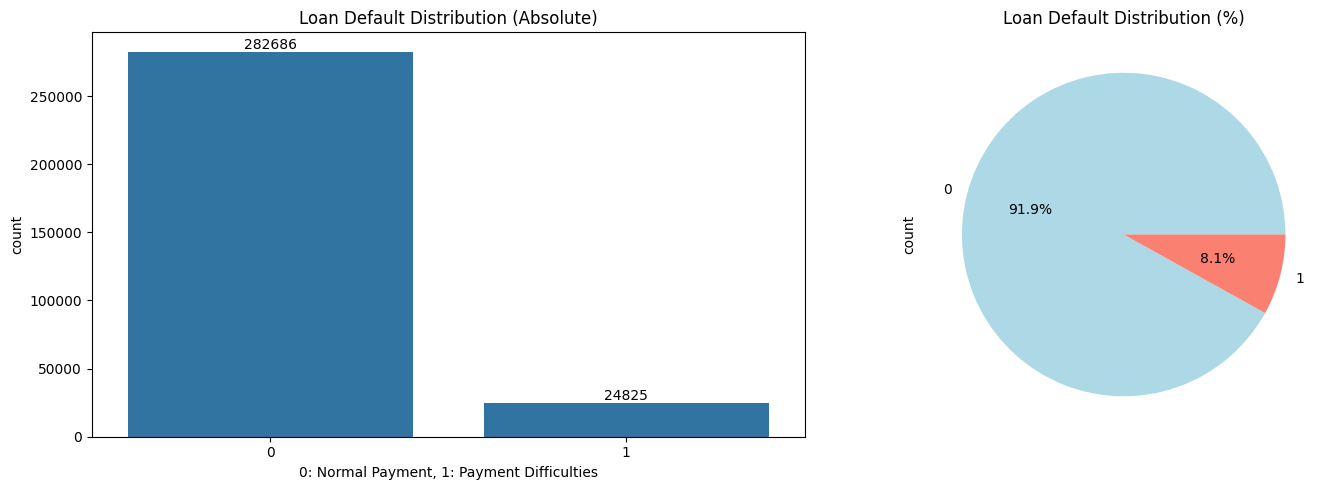


Class Distribution Analysis:
Non-Default Cases: 282,686 (91.93%)
Default Cases: 24,825 (8.07%)
Imbalance Ratio: 11.39:1

Note: Due to significant class imbalance, analysis results should be interpreted with caution.


In [21]:
# Analyze target variable distribution
eda.analyze_target_distribution()

There is a clear data imbalance since only 8% of the data consists of clients with payment difficulties i.e. Target 1, and the rest 92% of the data are those without payment difficulties, i.e TARGET 0.

**Imbalance:**

The dataset exhibits a significant imbalance, with non-default cases being over 11 times more frequent than default cases.
Imbalance Ratio: 11.39:1

**Implications:**

The skewed class distribution highlights the need for techniques such as oversampling, undersampling, or balanced metrics during predictive modeling to address bias.

# **Univariate Analysis**

## Categorical Feature Analysis
### Steps:
1. Visualize the distribution of unordered and ordered categorical features.
2. Segment distributions by `TARGET` to observe differences between defaulters and non-defaulters.


## **1. NAME_CONTRACT_TYPE**
- Majority chose **Cash loans**, with a higher default rate (8.35%) compared to **Revolving loans** (5.47%).
- **Insight**: Cash loans indicate higher risk.

## **2. NAME_INCOME_TYPE**
- Most defaulters are **Working**, but **Unemployed** have the highest default rate (36.36%).
- **Insight**: Income instability correlates with higher default rates.

## **3. NAME_FAMILY_STATUS**
- **Married** clients dominate, but **Civil marriage** has the highest default rate (9.94%).
- **Insight**: Family status influences default likelihood.

## **4. CODE_GENDER**
- Males have a higher default rate (10.14%) than females (6.99%).
- **Insight**: Gender differences in financial behavior.

## **5. NAME_EDUCATION_TYPE**
- Lower education levels, especially **Secondary/Special**, have higher default rates (8.93%).
- **Insight**: Education level impacts financial reliability.

## **6. OCCUPATION_TYPE**
- **Laborers** and **Low-skill laborers** have the highest default rates (>30%).
- **Insight**: High-risk occupations often relate to unstable income.

**Overall Observations**:
- **Income stability**, **education**, and **occupation** are key predictors of default risk.



=== Categorical Features Analysis ===

Analyzing Unordered Categorical Features:

Analyzing NAME_CONTRACT_TYPE


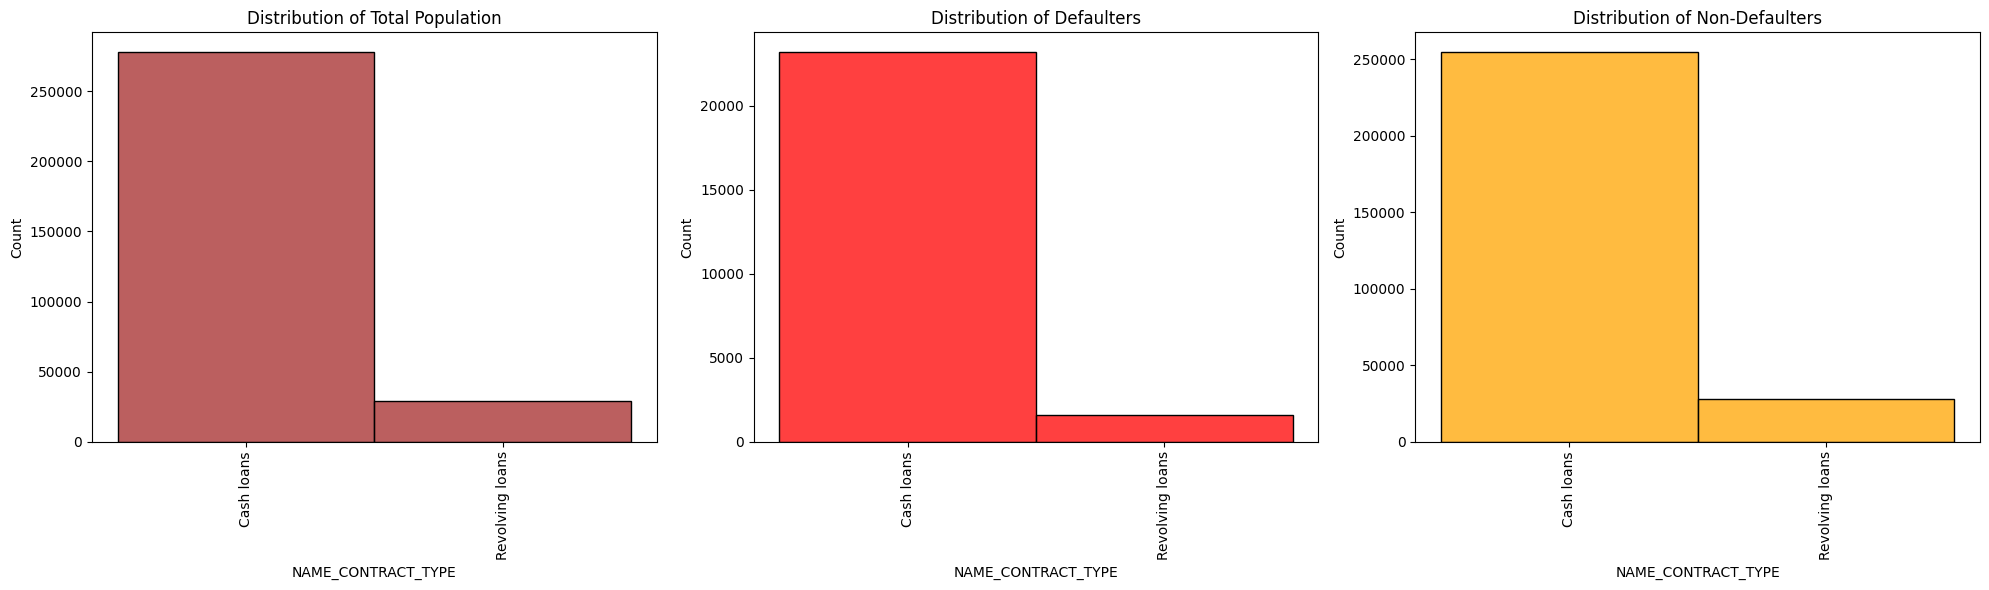


Value Counts for NAME_CONTRACT_TYPE:

Defaulters (%):
NAME_CONTRACT_TYPE
Cash loans         0.935388
Revolving loans    0.064612
Name: proportion, dtype: float64

Non-Defaulters (%):
NAME_CONTRACT_TYPE
Cash loans         0.9021
Revolving loans    0.0979
Name: proportion, dtype: float64

Default Rate by NAME_CONTRACT_TYPE (%):
NAME_CONTRACT_TYPE
Cash loans         8.345913
Revolving loans    5.478329
Name: 1, dtype: float64

Analyzing NAME_INCOME_TYPE


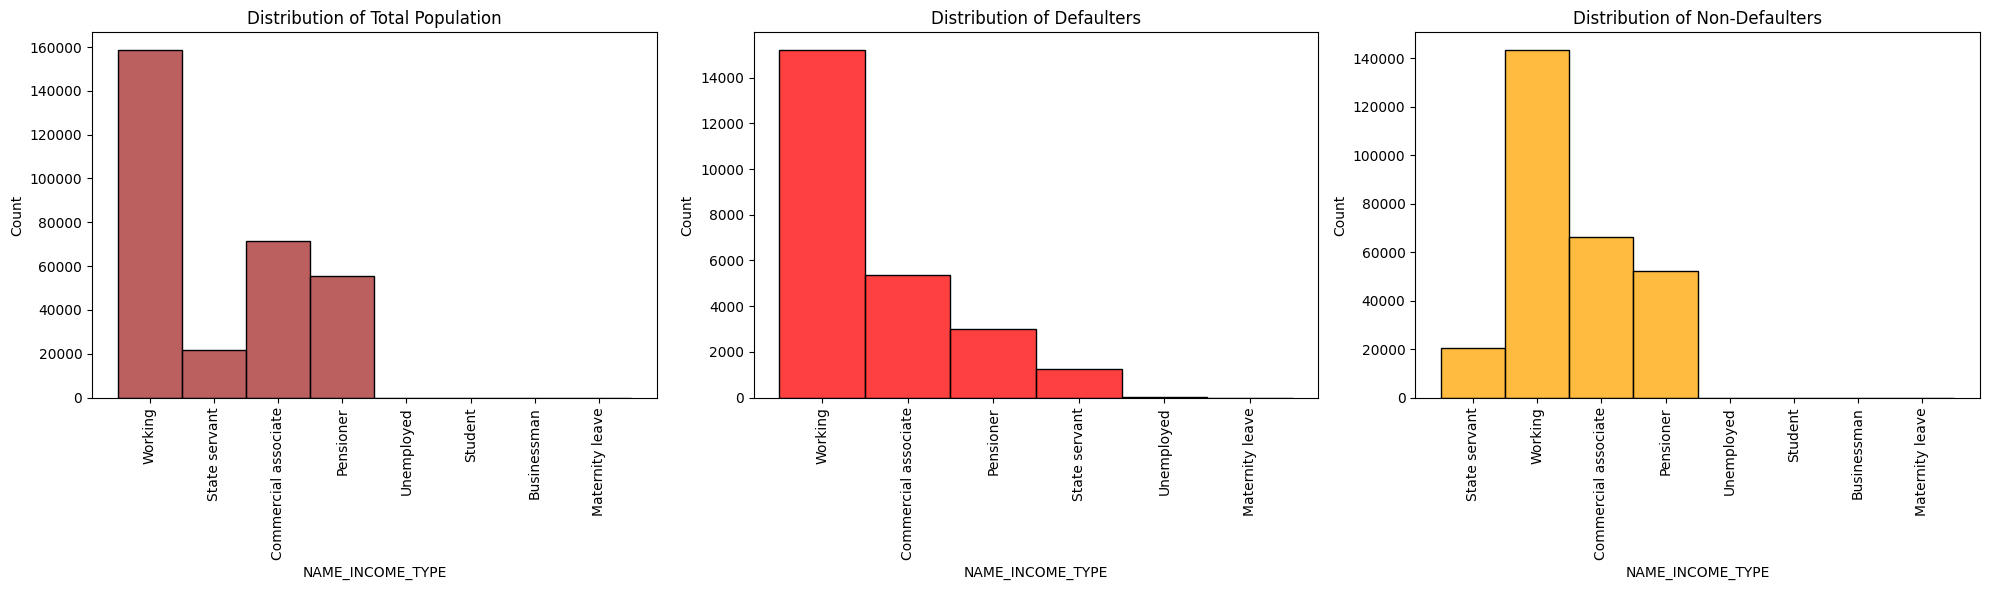


Value Counts for NAME_INCOME_TYPE:

Defaulters (%):
NAME_INCOME_TYPE
Working                 0.613253
Commercial associate    0.215911
Pensioner               0.120121
State servant           0.050312
Unemployed              0.000322
Maternity leave         0.000081
Name: proportion, dtype: float64

Non-Defaulters (%):
NAME_INCOME_TYPE
Working                 0.507807
Commercial associate    0.234384
Pensioner               0.185294
State servant           0.072356
Student                 0.000064
Unemployed              0.000050
Businessman             0.000035
Maternity leave         0.000011
Name: proportion, dtype: float64

Default Rate by NAME_INCOME_TYPE (%):
NAME_INCOME_TYPE
Maternity leave         40.000000
Unemployed              36.363636
Working                  9.588472
Commercial associate     7.484257
State servant            5.754965
Pensioner                5.386366
Businessman              0.000000
Student                  0.000000
Name: 1, dtype: float64

Analyzing N

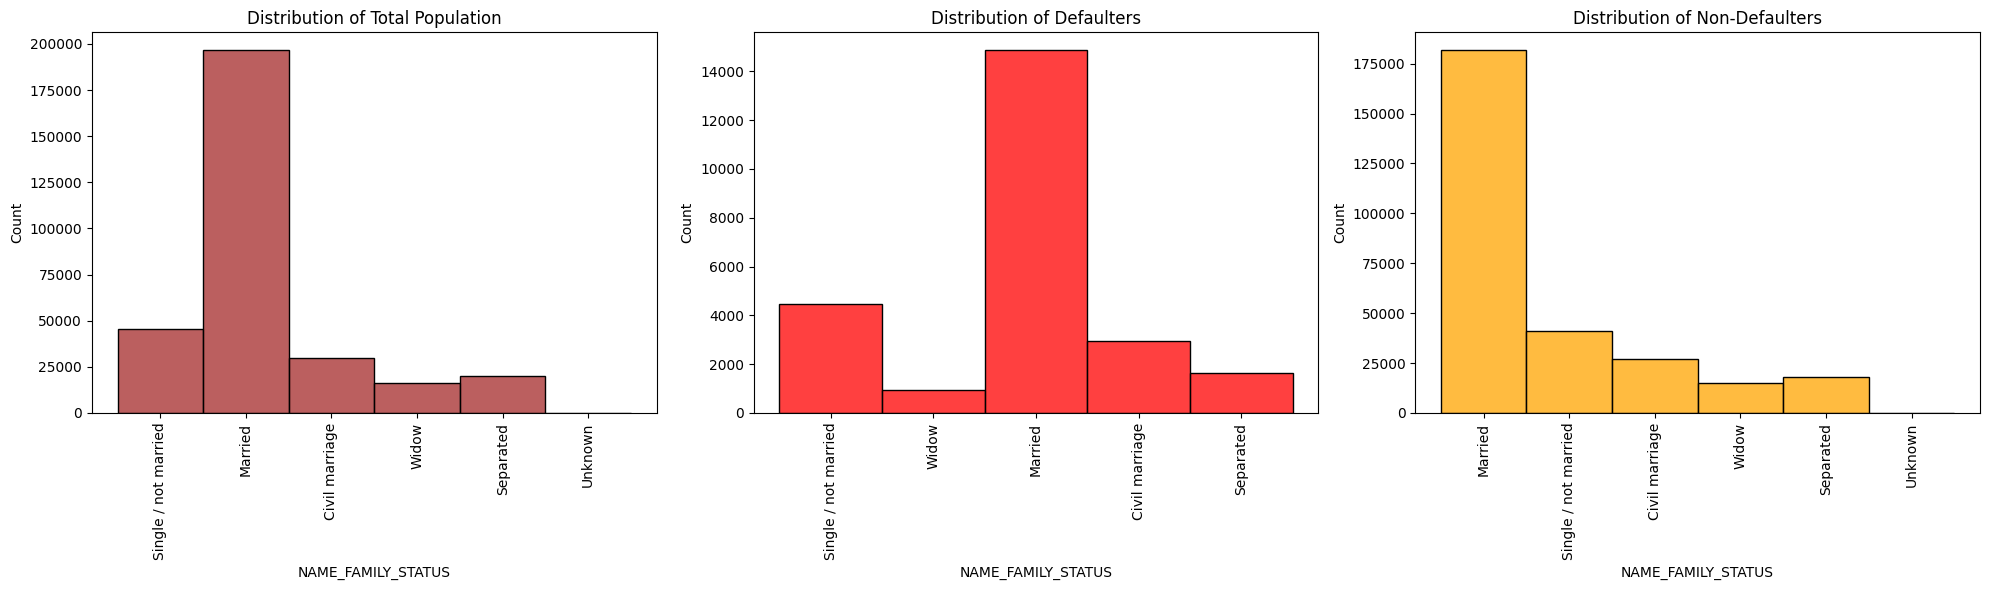


Value Counts for NAME_FAMILY_STATUS:

Defaulters (%):
NAME_FAMILY_STATUS
Married                 0.598187
Single / not married    0.179537
Civil marriage          0.119275
Separated               0.065257
Widow                   0.037744
Name: proportion, dtype: float64

Non-Defaulters (%):
NAME_FAMILY_STATUS
Married                 0.642345
Single / not married    0.144991
Civil marriage          0.094854
Separated               0.064206
Widow                   0.053597
Unknown                 0.000007
Name: proportion, dtype: float64

Default Rate by NAME_FAMILY_STATUS (%):
NAME_FAMILY_STATUS
Civil marriage          9.944584
Single / not married    9.807675
Separated               8.194234
Married                 7.559868
Widow                   5.824217
Unknown                 0.000000
Name: 1, dtype: float64

Analyzing CODE_GENDER


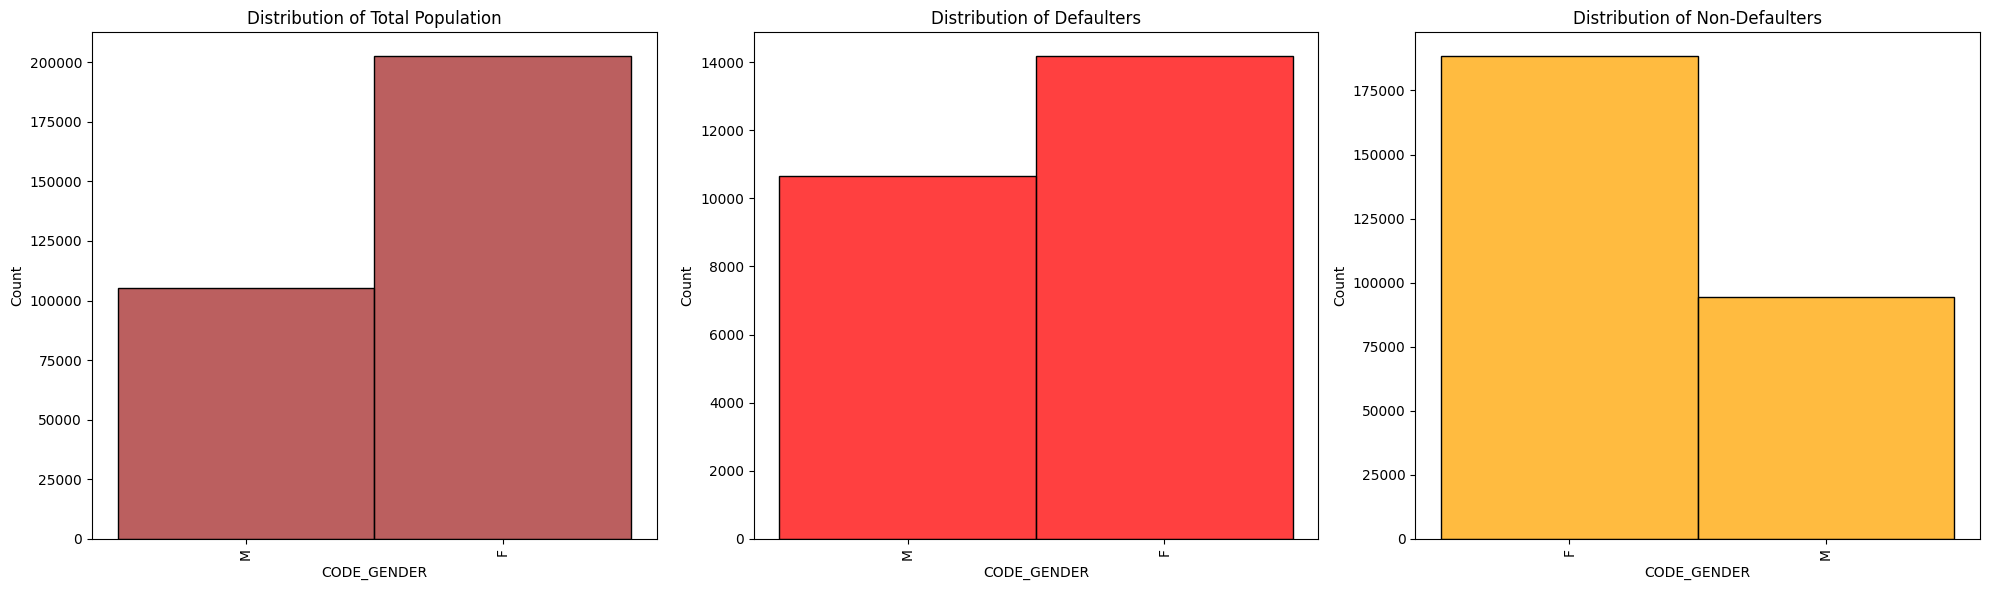


Value Counts for CODE_GENDER:

Defaulters (%):
CODE_GENDER
F    0.570796
M    0.429204
Name: proportion, dtype: float64

Non-Defaulters (%):
CODE_GENDER
F    0.666046
M    0.333954
Name: proportion, dtype: float64

Default Rate by CODE_GENDER (%):
CODE_GENDER
M    10.14192
F     6.99919
Name: 1, dtype: float64

Analyzing OCCUPATION_TYPE


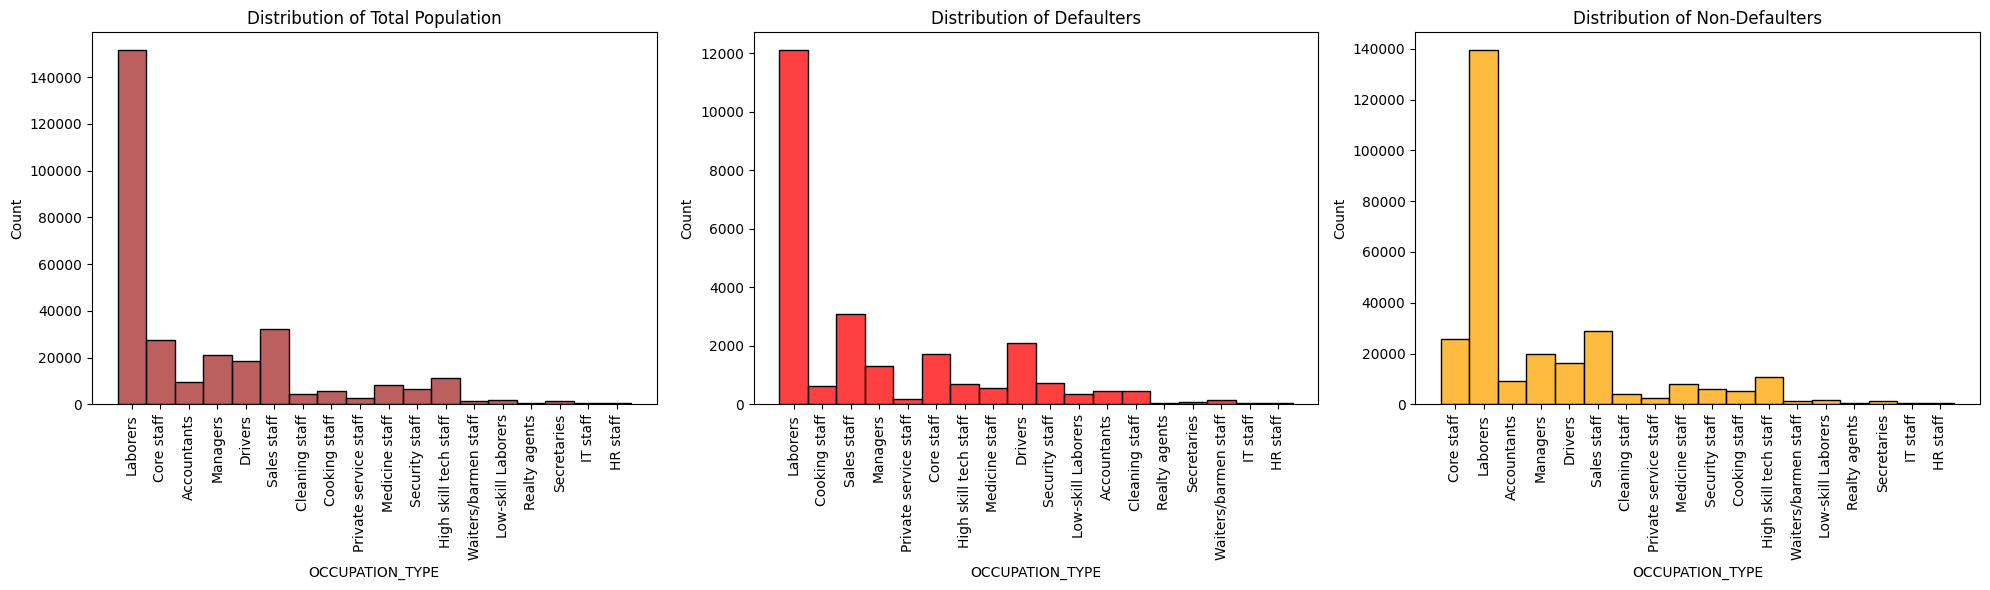


Value Counts for OCCUPATION_TYPE:

Defaulters (%):
OCCUPATION_TYPE
Laborers                 0.488056
Sales staff              0.124552
Drivers                  0.084874
Core staff               0.070010
Managers                 0.053494
Security staff           0.029084
High skill tech staff    0.028238
Cooking staff            0.025015
Medicine staff           0.023041
Accountants              0.019094
Cleaning staff           0.018006
Low-skill Laborers       0.014461
Private service staff    0.007049
Waiters/barmen staff     0.006123
Secretaries              0.003706
Realty agents            0.002377
HR staff                 0.001450
IT staff                 0.001370
Name: proportion, dtype: float64

Non-Defaulters (%):
OCCUPATION_TYPE
Laborers                 0.493342
Sales staff              0.102623
Core staff               0.091381
Managers                 0.070902
Drivers                  0.058354
High skill tech staff    0.037777
Accountants              0.033037
Medicine sta

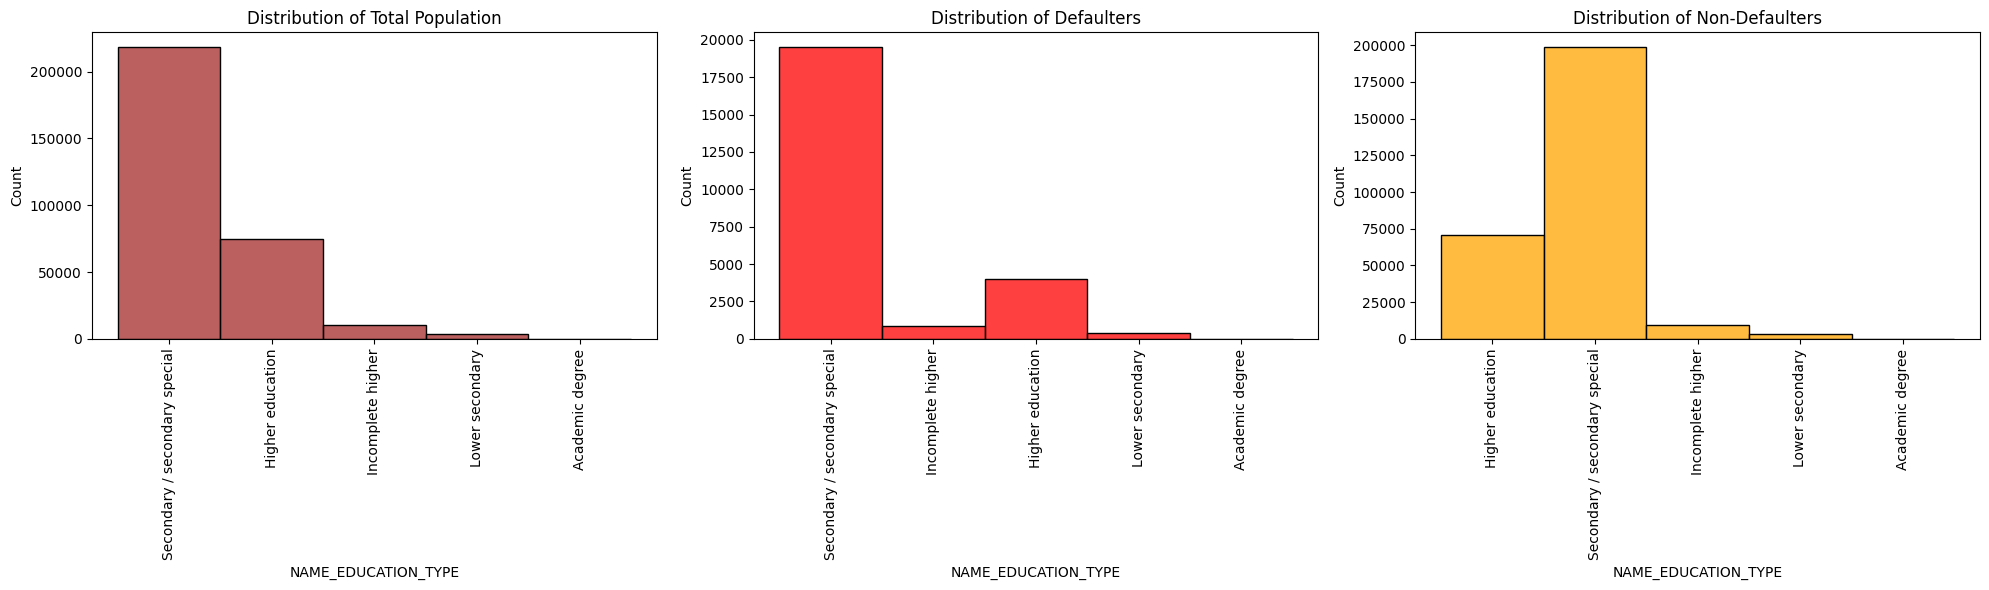


Value Counts for NAME_EDUCATION_TYPE:

Defaulters (%):
NAME_EDUCATION_TYPE
Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: proportion, dtype: float64

Non-Defaulters (%):
NAME_EDUCATION_TYPE
Secondary / secondary special    0.703491
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Academic degree                  0.000570
Name: proportion, dtype: float64

Default Rate Progression by NAME_EDUCATION_TYPE (%):
NAME_EDUCATION_TYPE
Academic degree                   1.829268
Higher education                  5.355115
Incomplete higher                 8.484966
Lower secondary                  10.927673
Secondary / secondary special     8.939929
Name: 1, dtype: float64


In [22]:
# Analyze categorical features
eda.analyze_categorical_features()

## Numerical Feature Analysis
### Steps:
1. Analyze distributions of numerical features using histograms and KDE plots.
2. Segment distributions by `TARGET` to observe differences between defaulters and non-defaulters.
3. Identify patterns such as skewness, concentration, and potential outliers.


# **1: AMT_INCOME_TOTAL**

## **Key Insights:**
- **Median Income:** Defaulters (\$135,000) are slightly lower than non-defaulters (\$148,500).
- **Outliers:** 14,035 (4.56%) outliers skew the data towards higher incomes.
- **Default Rates:** Highest in \$99,000–\$135,000 range (8.58%), lowest in \$225,000+ (6.51%).
- **Percentiles:** Majority earn below \$270,000; higher earners have lower default rates.

## **Recommendations:**
- Focus on middle-income groups (\$99,000–\$135,000) for risk management.
- Consider handling outliers to improve analysis and modeling.


# **2: AMT_CREDIT**

## **Key Insights:**
- **Median Credit:** Defaulters (\$497,520) are slightly lower than non-defaulters (\$517,788).
- **Outliers:** 6,562 outliers (2.13%) detected, mostly high credit amounts.
- **Default Rates:** Highest in \$432,000–\$604,152 range (10.05%).

## **Recommendations:**
- Focus on mid-credit clients for risk management.
- Address outliers for better model accuracy.


# **3: AMT_ANNUITY**

## **Key Insights:**
- **Median Annuity:** Defaulters (\$25,263) are slightly lower than non-defaulters (\$24,876).
- **Outliers:** 7,504 outliers (2.44%) detected, primarily at high annuity values.
- **Default Rates:** Highest in \$28,062–\$37,516 range (9.34%).

## **Recommendations:**
- Monitor clients with annuities in the \$28,062–\$37,516 range.
- Handle high-value outliers to improve model performance.


# **4: AMT_GOODS_PRICE**

## **Key Insights:**
- **Median Price:** Defaulters and non-defaulters have the same median (\$450,000).
- **Outliers:** 14,728 outliers (4.79%) detected, primarily at high price ranges.
- **Default Rates:** Highest in \$378,000–\$522,000 range (10.35%).

## **Recommendations:**
- Focus on goods priced between \$378,000–\$522,000 for risk management.
- Handle high-value outliers to improve model predictions.


# **5: AGE**

## **Key Insights:**
- **Mean Age:** Defaulters (40.77 years) are younger than non-defaulters (43.71 years).
- **Default Rates:** Highest in the youngest age group (20–32 years, 11.09%) and decrease with age.
- **Outliers:** No outliers detected for AGE.

## **Recommendations:**
- Younger clients (20–32 years) should be prioritized for risk management.
- Age is a strong predictor of default likelihood.


# **6: YEARS_EMPLOYED**

## **Key Insights:**
- **Mean Employment:** Defaulters (3.83 years) have shorter employment durations than non-defaulters (4.61 years).
- **Default Rates:** Highest for clients employed for less than 2 years (11.04%) and decrease with longer employment.
- **Outliers:** No outliers detected.

## **Recommendations:**
- Focus on clients with employment less than 2 years for risk management.
- Employment duration is a significant predictor of default risk.


# **7: CNT_FAM_MEMBERS**

## **Key Insights:**
- **Mean Family Members:** Defaulters (2.18) are slightly higher than non-defaulters (2.15).
- **Default Rates:** Highest for families with 11+ members (100%), though very rare.
- **Outliers:** 4,007 outliers (1.3%) detected, mostly for families with 7+ members.

## **Recommendations:**
- Monitor larger families (7+ members) closely due to higher risk.
- Family size can influence financial stability and repayment ability.



=== Numerical Features Analysis ===

Analyzing AMT_INCOME_TOTAL


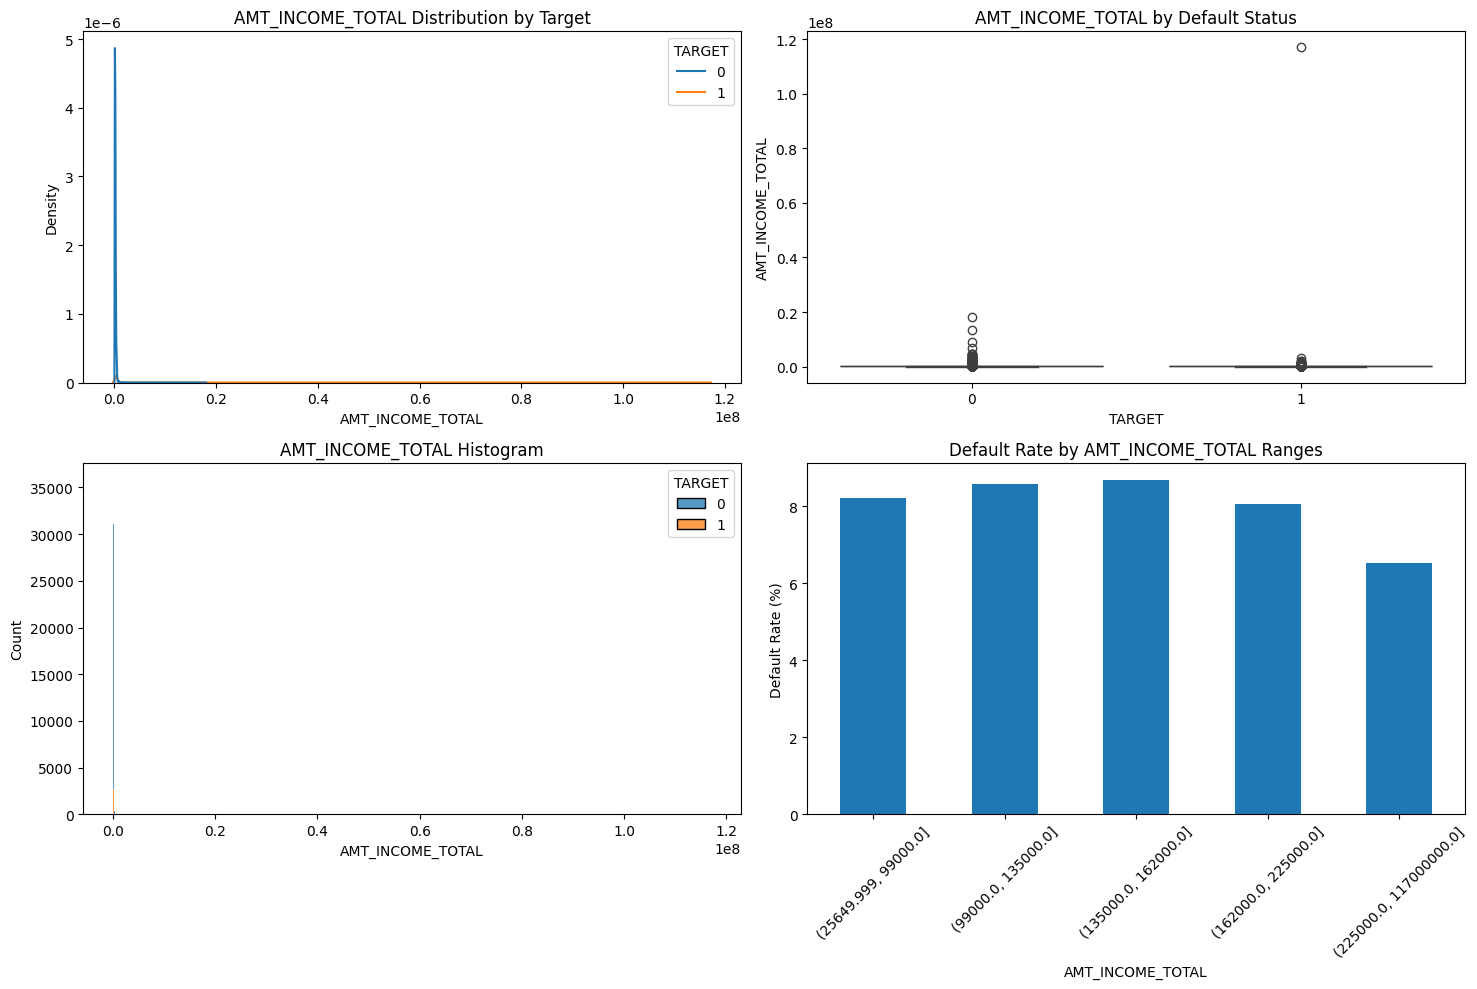


Summary Statistics by Target:
           count           mean            std      min       25%       50%  \
TARGET                                                                        
0       282686.0  169077.722266  110476.268524  25650.0  112500.0  148500.0   
1        24825.0  165611.760906  746676.959440  25650.0  112500.0  135000.0   

             75%          max  
TARGET                         
0       202500.0   18000090.0  
1       202500.0  117000000.0  

Outlier Analysis for AMT_INCOME_TOTAL:
Number of outliers: 14,035
Percentage of outliers: 4.56%

Default Rates by AMT_INCOME_TOTAL Ranges (%):
                         Count  Default Rate (%)
AMT_INCOME_TOTAL                                
(25649.999, 99000.0]     63671          8.206248
(99000.0, 135000.0]      85756          8.588320
(135000.0, 162000.0]     35453          8.684738
(162000.0, 225000.0]     75513          8.056891
(225000.0, 117000000.0]  47118          6.519801

Percentile Analysis:
10th percentile

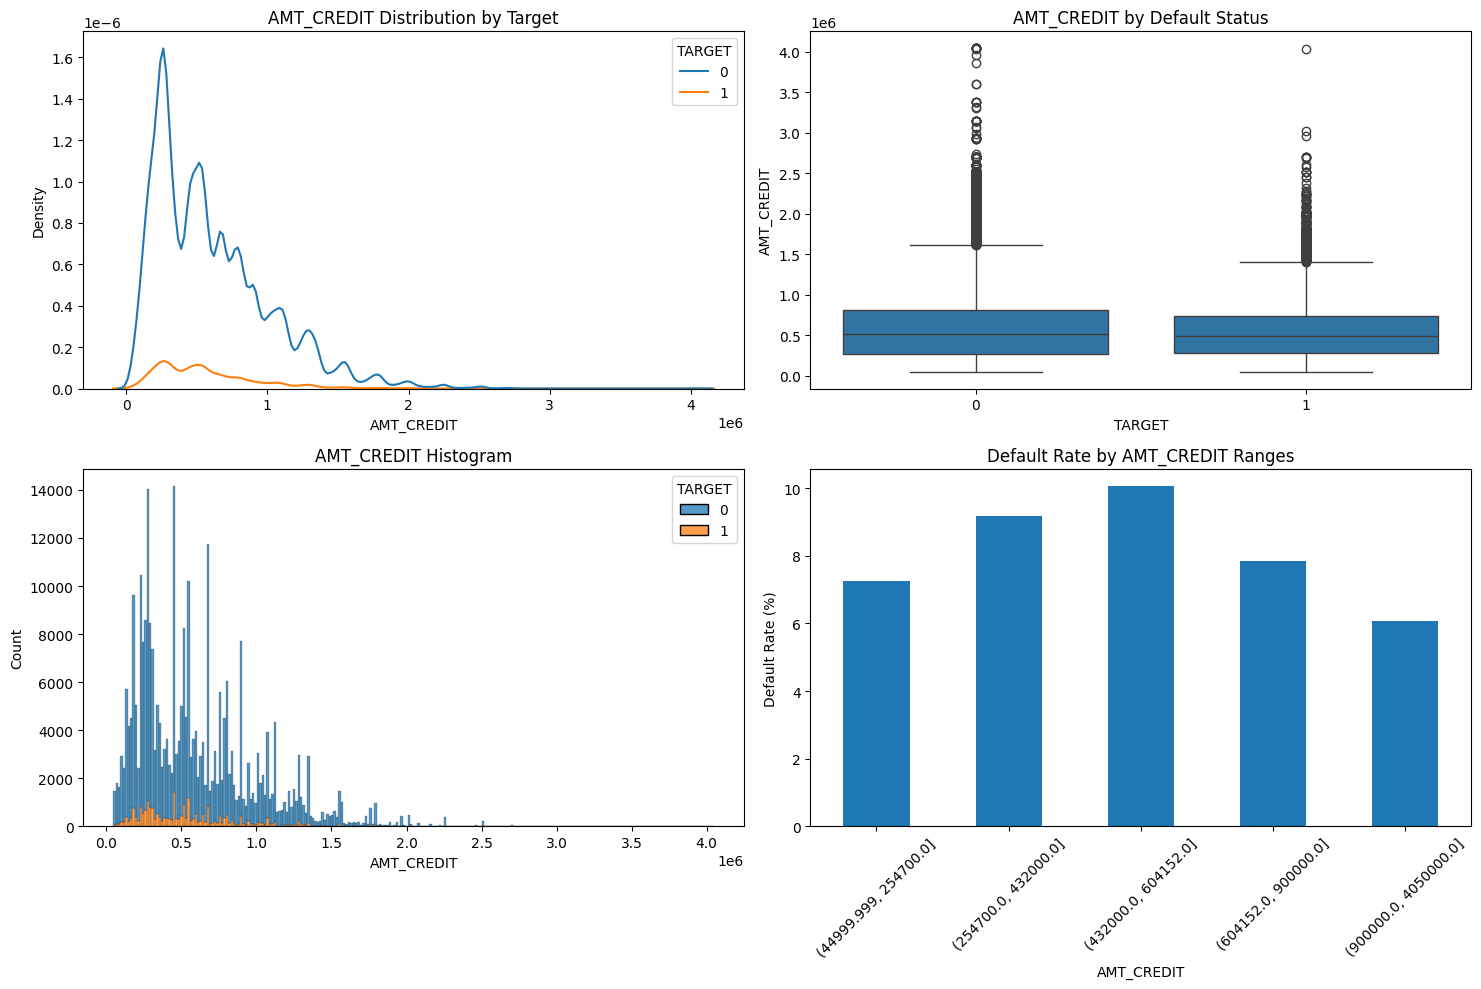


Summary Statistics by Target:
           count           mean            std      min       25%       50%  \
TARGET                                                                        
0       282686.0  602648.282002  406845.907710  45000.0  270000.0  517788.0   
1        24825.0  557778.527674  346433.235646  45000.0  284400.0  497520.0   

             75%        max  
TARGET                       
0       810000.0  4050000.0  
1       733315.5  4027680.0  

Outlier Analysis for AMT_CREDIT:
Number of outliers: 6,562
Percentage of outliers: 2.13%

Default Rates by AMT_CREDIT Ranges (%):
                       Count  Default Rate (%)
AMT_CREDIT                                    
(44999.999, 254700.0]  64925          7.237582
(254700.0, 432000.0]   58098          9.172433
(432000.0, 604152.0]   61552         10.054913
(604152.0, 900000.0]   64024          7.854867
(900000.0, 4050000.0]  58912          6.075163

Percentile Analysis:
10th percentile: 180,000.00
25th percentile: 270,0

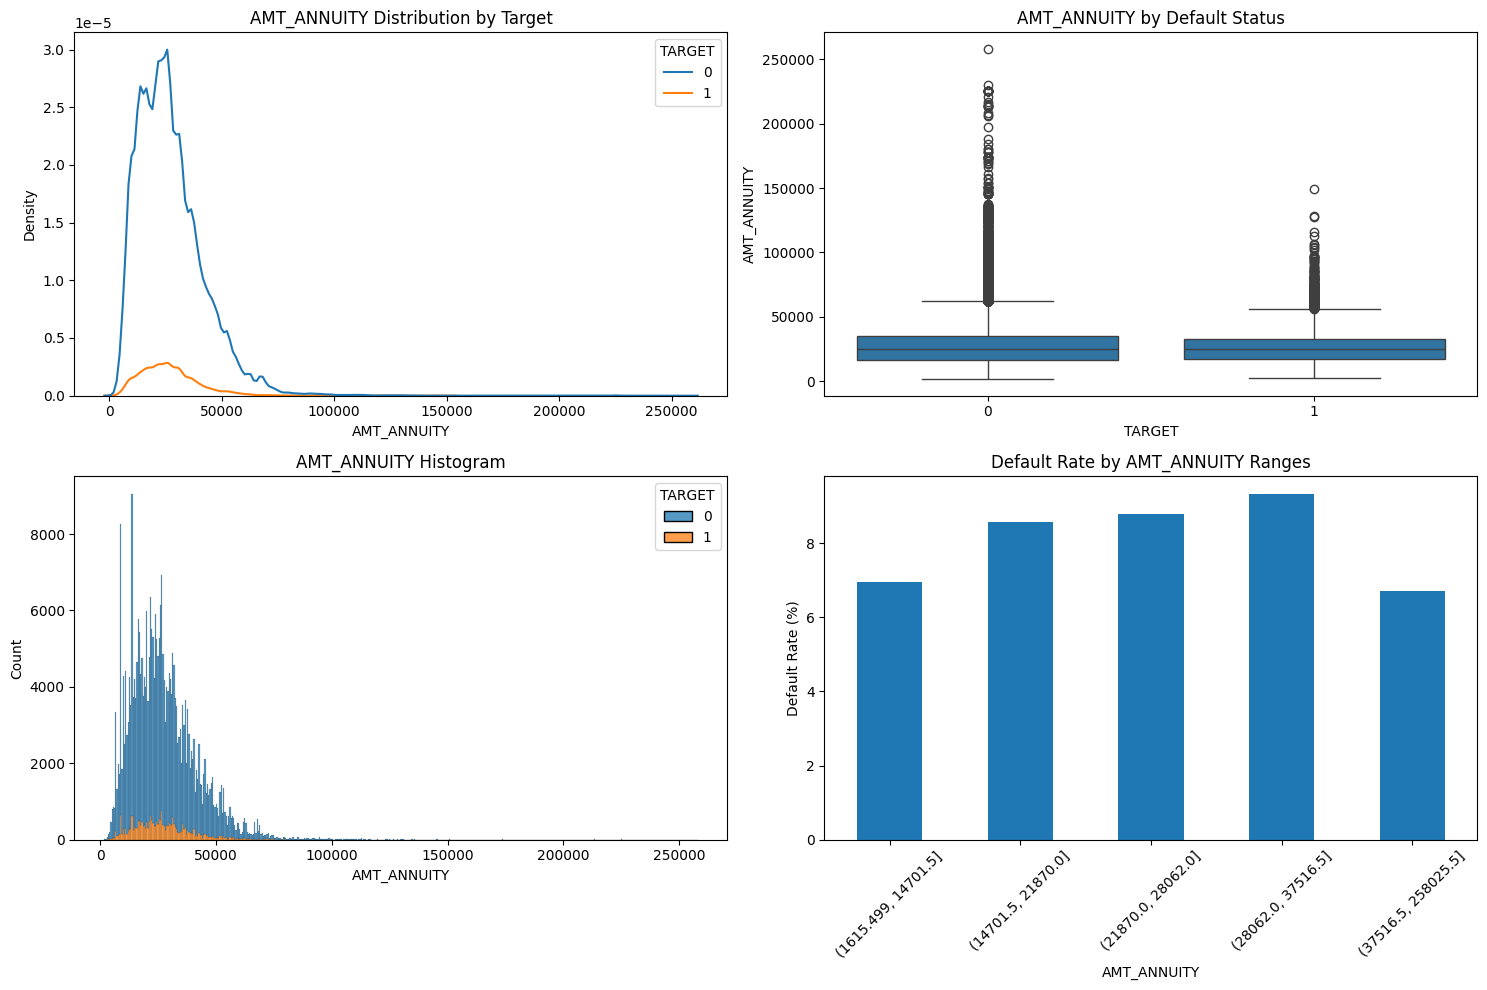


Summary Statistics by Target:
           count          mean           std     min      25%      50%  \
TARGET                                                                   
0       282686.0  27163.527386  14658.003451  1615.5  16456.5  24876.0   
1        24825.0  26481.744290  12450.676999  2722.5  17361.0  25263.0   

            75%       max  
TARGET                     
0       34749.0  258025.5  
1       32976.0  149211.0  

Outlier Analysis for AMT_ANNUITY:
Number of outliers: 7,504
Percentage of outliers: 2.44%

Default Rates by AMT_ANNUITY Ranges (%):
                     Count  Default Rate (%)
AMT_ANNUITY                                 
(1615.499, 14701.5]  61507          6.948803
(14701.5, 21870.0]   61499          8.582253
(21870.0, 28062.0]   61569          8.790138
(28062.0, 37516.5]   61452          9.338996
(37516.5, 258025.5]  61484          6.704183

Percentile Analysis:
10th percentile: 11,074.50
25th percentile: 16,524.00
50th percentile: 24,903.00
75th perc

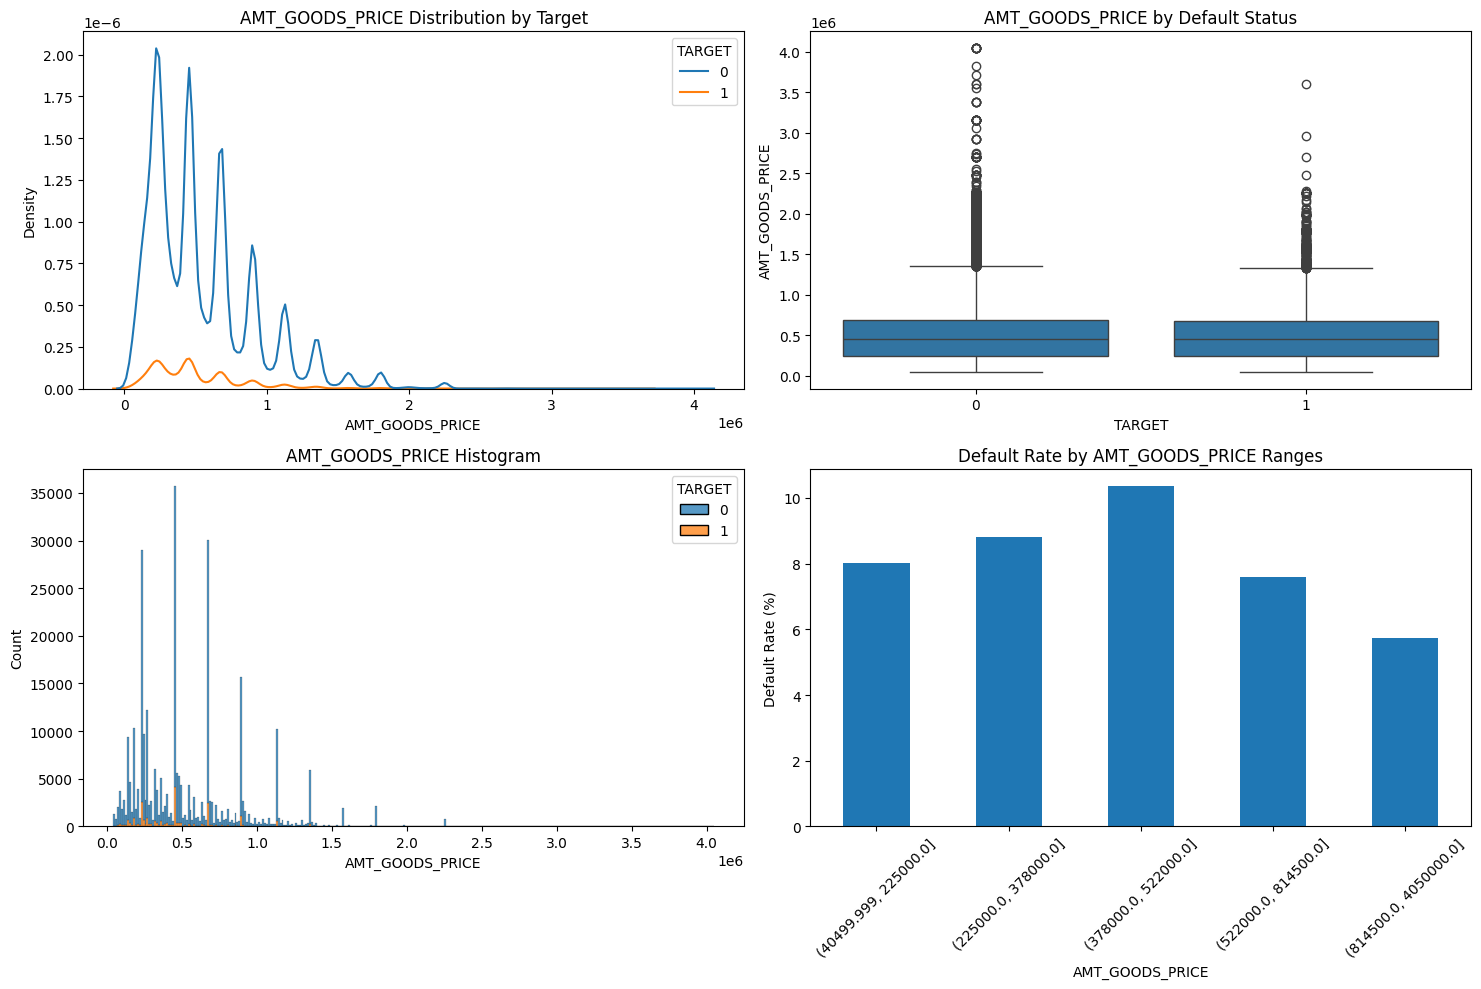


Summary Statistics by Target:
           count           mean            std      min       25%       50%  \
TARGET                                                                        
0       282686.0  542652.484651  373625.997289  40500.0  238500.0  450000.0   
1        24825.0  488939.444955  311506.712723  45000.0  238500.0  450000.0   

               75%        max  
TARGET                         
0       685002.375  4050000.0  
1       675000.000  3600000.0  

Outlier Analysis for AMT_GOODS_PRICE:
Number of outliers: 14,728
Percentage of outliers: 4.79%

Default Rates by AMT_GOODS_PRICE Ranges (%):
                       Count  Default Rate (%)
AMT_GOODS_PRICE                               
(40499.999, 225000.0]  71454          8.012148
(225000.0, 378000.0]   51745          8.810513
(378000.0, 522000.0]   61533         10.355419
(522000.0, 814500.0]   61349          7.579586
(814500.0, 4050000.0]  61430          5.728471

Percentile Analysis:
10th percentile: 180,000.00
25t

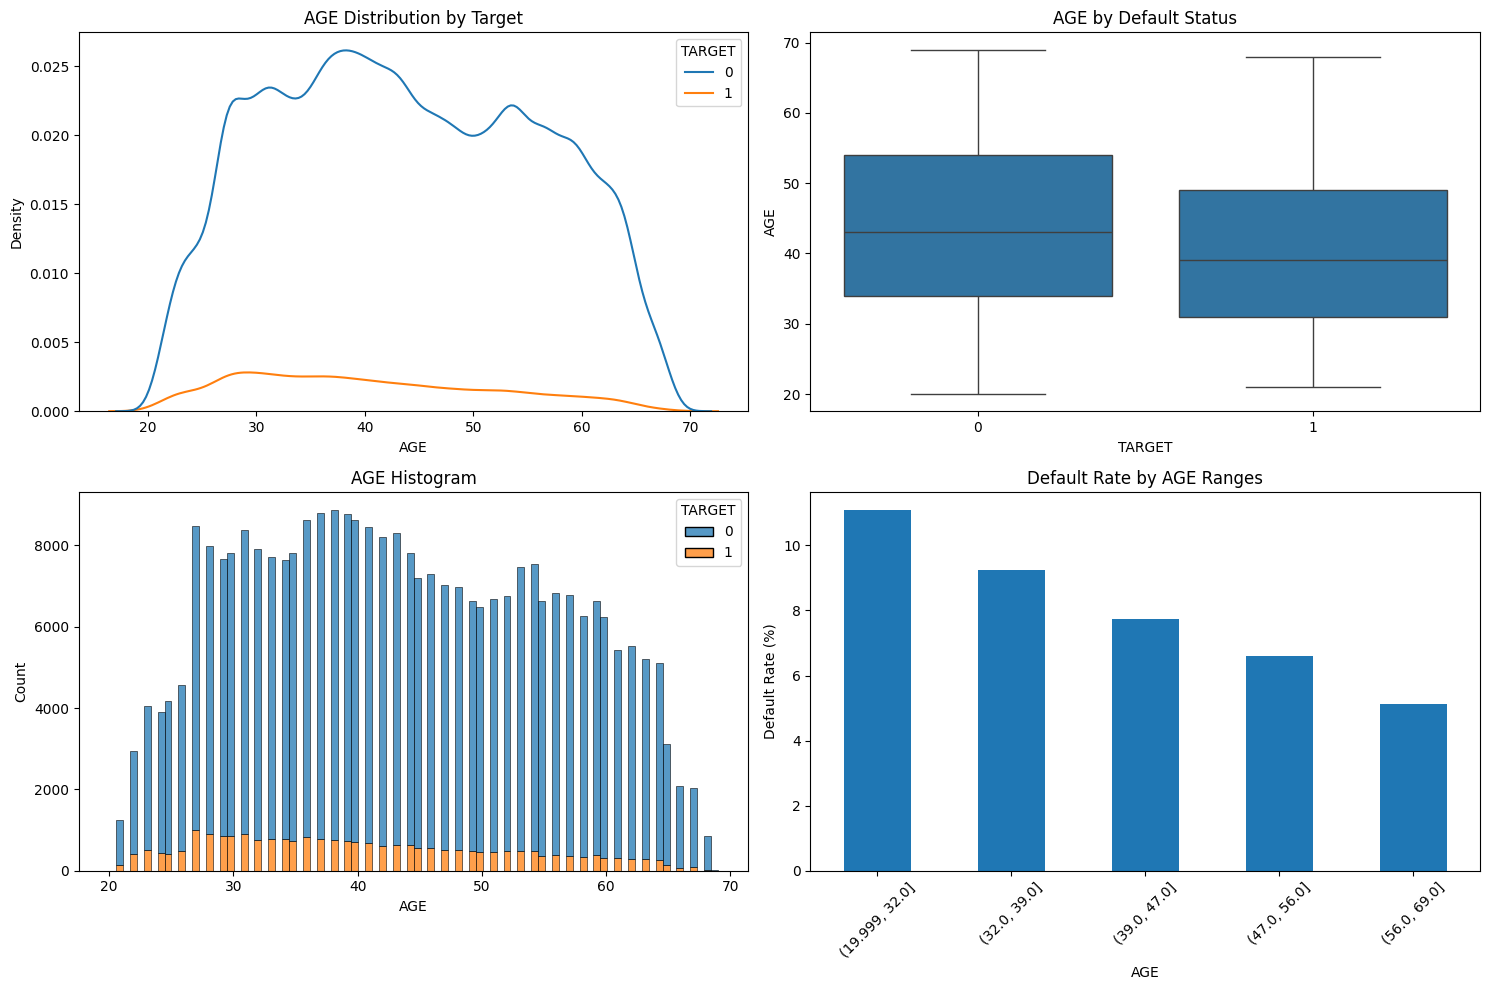


Summary Statistics by Target:
           count       mean        std   min   25%   50%   75%   max
TARGET                                                              
0       282686.0  43.713123  11.955290  20.0  34.0  43.0  54.0  69.0
1        24825.0  40.279960  11.484458  21.0  31.0  39.0  49.0  68.0

Outlier Analysis for AGE:
Number of outliers: 0
Percentage of outliers: 0.00%

Default Rates by AGE Ranges (%):
                Count  Default Rate (%)
AGE                                    
(19.999, 32.0]  69094         11.092135
(32.0, 39.0]    58205          9.236320
(39.0, 47.0]    62932          7.722621
(47.0, 56.0]    62018          6.612596
(56.0, 69.0]    55262          5.110202

Analyzing YEARS_EMPLOYED


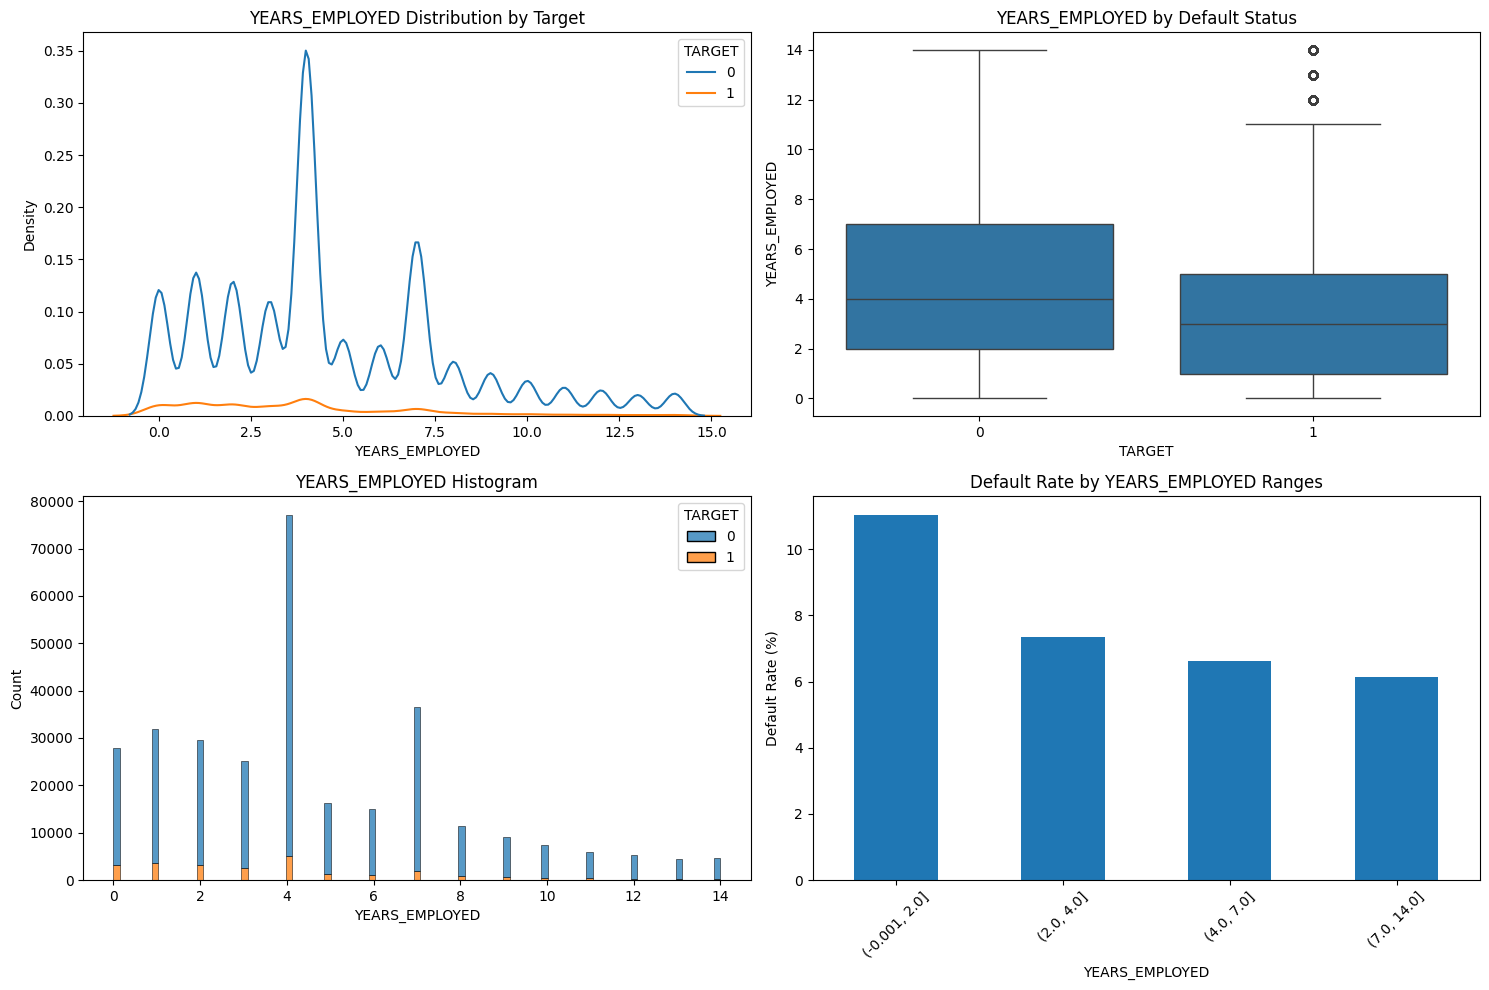


Summary Statistics by Target:
           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       282686.0  4.611675  3.284618  0.0  2.0  4.0  7.0  14.0
1        24825.0  3.830937  3.136179  0.0  1.0  3.0  5.0  14.0

Outlier Analysis for YEARS_EMPLOYED:
Number of outliers: 0
Percentage of outliers: 0.00%

Default Rates by YEARS_EMPLOYED Ranges (%):
                 Count  Default Rate (%)
YEARS_EMPLOYED                          
(-0.001, 2.0]    89393         11.041133
(2.0, 4.0]      102248          7.359557
(4.0, 7.0]       67883          6.608429
(7.0, 14.0]      47987          6.134995

Analyzing CNT_FAM_MEMBERS


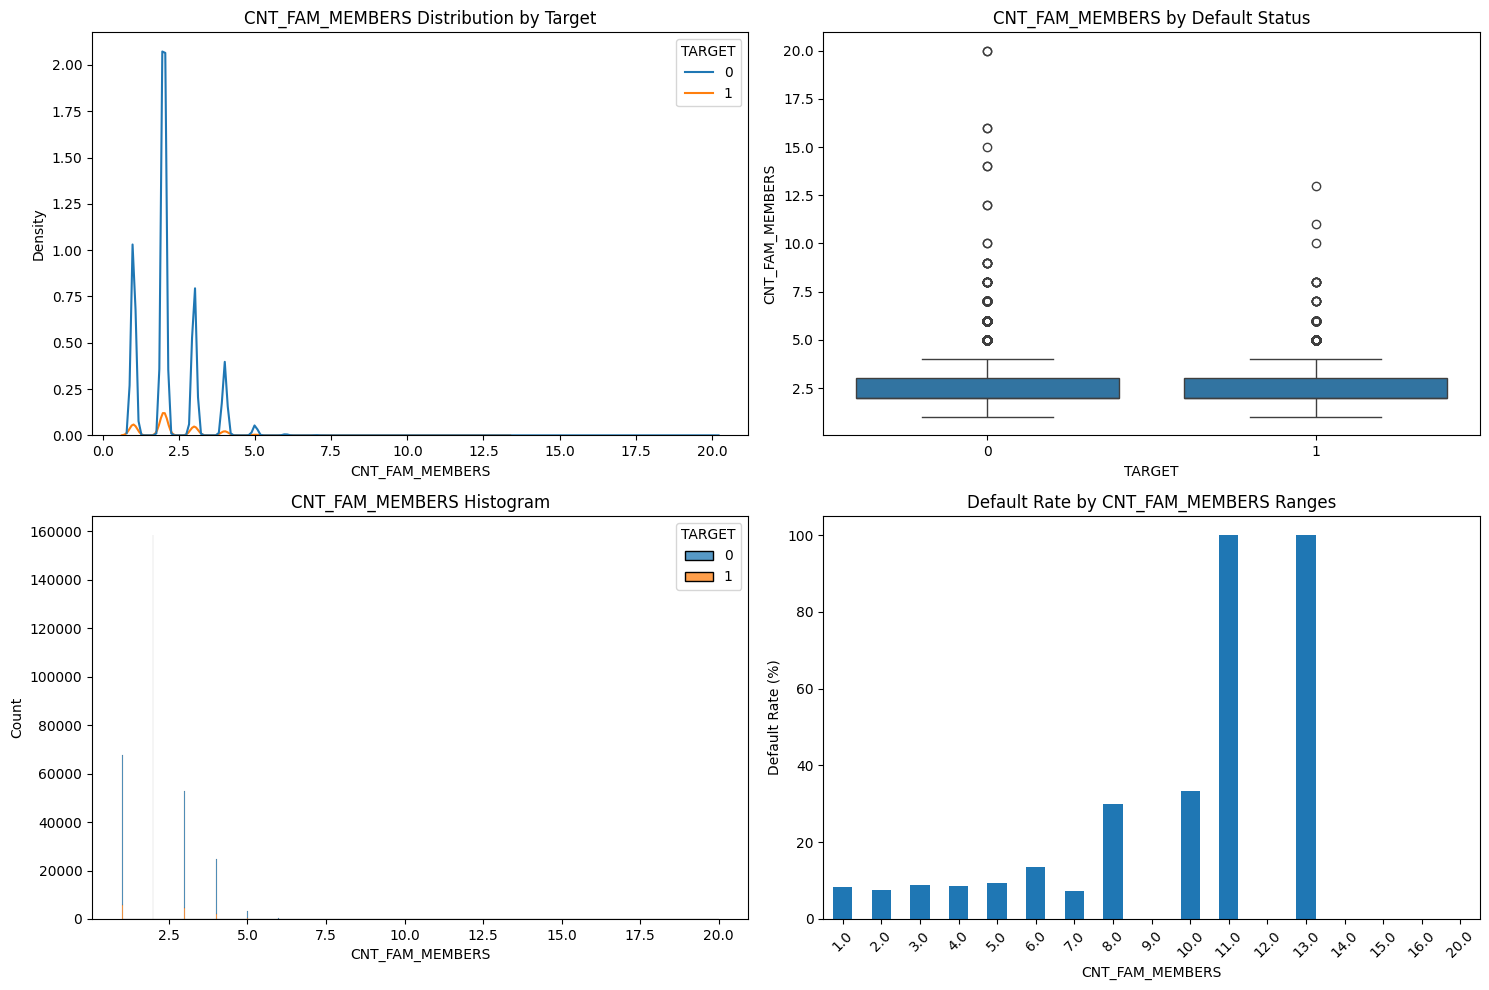


Summary Statistics by Target:
           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       282686.0  2.150152  0.906981  1.0  2.0  2.0  3.0  20.0
1        24825.0  2.181269  0.951327  1.0  2.0  2.0  3.0  13.0

Outlier Analysis for CNT_FAM_MEMBERS:
Number of outliers: 4,007
Percentage of outliers: 1.30%

Default Rates by CNT_FAM_MEMBERS Ranges (%):
                  Count  Default Rate (%)
CNT_FAM_MEMBERS                          
11.0                  1        100.000000
13.0                  1        100.000000
10.0                  3         33.333333
8.0                  20         30.000000
6.0                 408         13.480392
5.0                3478          9.401955
3.0               52601          8.760290
4.0               24697          8.648824
1.0               67847          8.364408
2.0              158359          7.583402
7.0                  81          7.407407
15.0                  1       

In [23]:
# Analyze numerical features
eda.analyze_numerical_features()

## Binned Features Analysis

### Objective:
- Simplify the analysis of numerical features by converting continuous values into discrete bins.
- Analyze the relationship between these binned features and the target variable (`TARGET`), specifically focusing on default rates.

### Key Steps:
1. Identify binned numerical features (e.g., `AGE_BINNED`, `AMT_INCOME_TOTAL_BINNED`).
2. Calculate the default rate (`TARGET=1`) for each bin.
3. Visualize the default rate distribution across bins using bar plots.
4. Gain insights into how different customer segments (e.g., age groups, income levels) impact default risk.


# **1: YEARS_EMPLOYED_BINNED**

## **Key Insights:**
- **Default Rates:**
  - Highest in **Entry Level** (11.0%), decreasing with longer employment.
  - Lowest in **Senior** employees (5.9%).
- **Risk Index:**
  - **Entry Level:** 1.37 (higher risk than average).
  - **Senior:** 0.73 (lower risk than average).

## **Recommendations:**
- Focus on **Entry Level** employees for higher monitoring and risk mitigation.
- Employment duration is a critical indicator of financial stability.


# **2: AGE_BINNED**

## **Key Insights:**
- **Default Rates:**
  - Highest in **Very Low** age group (11.7%), decreasing with age.
  - Lowest in **Very High** age group (5.2%).
- **Risk Index:**
  - **Very Low:** 1.45 (highest risk).
  - **Very High:** 0.64 (lowest risk).

## **Recommendations:**
- Focus on younger clients (**Very Low** and **Low** age groups) for risk management.
- Older clients (**High** and **Very High**) are less likely to default.


# **3: AMT_INCOME_TOTAL_BINNED**

## **Key Insights:**
- **Default Rates:**
  - Highest in **Low** income group (8.6%), gradually decreasing with higher income.
  - Lowest in **Very High** income group (6.0%).
- **Risk Index:**
  - **Low Income:** 1.07 (highest risk).
  - **Very High Income:** 0.74 (lowest risk).

## **Recommendations:**
- Closely monitor clients in the **Low** income group due to higher risk.
- Income level is a significant factor influencing default likelihood.


# **4: AMT_CREDIT_BINNED**

## **Key Insights:**
- **Default Rates:**
  - Highest in **Low** credit group (8.9%), slightly decreasing with higher credit amounts.
  - Lowest in **Very High** credit group (3.2%).
- **Risk Index:**
  - **Low Credit:** 1.11 (highest risk).
  - **Very High Credit:** 0.40 (lowest risk).

## **Recommendations:**
- Monitor clients with **Low** and **Medium** credit amounts for higher default risks.
- Higher credit amounts tend to correlate with lower default rates.


# **5: Features Analysis: AMT_ANNUITY_BINNED**

## **Key Insights:**
- **Default Rates:**
  - Highest in **Low** annuity group (8.9%) and decreases with increasing annuity amounts.
  - Lowest in **Very High** annuity group (2.0%).
- **Risk Index:**
  - **Low Annuity:** 1.11 (highest risk).
  - **Very High Annuity:** 0.25 (lowest risk).

## **Recommendations:**
- Focus on clients with **Low** and **Very Low** annuity amounts for higher risk mitigation.
- Higher annuities are associated with significantly lower default risks.


# **6: AMT_GOODS_PRICE_BINNED**

## **Key Insights:**
- **Default Rates:**
  - Highest in **Medium** goods price group (9.8%).
  - Lowest in **Very High** goods price group (5.0%).
- **Risk Index:**
  - **Medium Price:** 1.22 (highest risk).
  - **Very High Price:** 0.62 (lowest risk).

## **Recommendations:**
- Monitor loans with **Medium** and **Low** goods prices for increased default risk.
- Higher goods prices (e.g., **High** and **Very High**) correlate with reduced risk.


# **7: EXT_SOURCE_2_BINNED**

## **Key Insights:**
- **Default Rates:**
  - Highest in **Low** bin (14.3%).
  - Lowest in **Very High** bin (3.8%).
- **Risk Index:**
  - **Low:** 1.77 (highest risk).
  - **Very High:** 0.47 (lowest risk).

## **Recommendations:**
- Pay close attention to loans in the **Low** bin due to significant default risks.
- Borrowers in the **Very High** bin are least risky.


# **8: EXT_SOURCE_3_BINNED**

## **Key Insights:**
- **Default Rates:**
  - Highest in **Low** bin (13.8%).
  - Lowest in **Very High** bin (3.7%).
- **Risk Index:**
  - **Low:** 1.72 (highest risk).
  - **Very High:** 0.45 (lowest risk).

## **Recommendations:**
- Loans in the **Low** bin are high-risk and should be closely monitored.
- Borrowers in the **Very High** bin are the least risky.


# **9: CREDIT_TO_INCOME_BINNED**

## **Key Insights:**
- **Default Rates:**
  - Highest in **Medium** bin (8.93%).
  - Lowest in **Very High** bin (7.25%).
- **Risk Index:**
  - **Medium:** 1.11 (highest risk).
  - **Very High:** 0.90 (lowest risk).

## **Recommendations:**
- Borrowers in the **Medium** and **Low** bins should be carefully assessed as they pose higher risks.
- Loans to **Very High** and **Very Low** bins are relatively safer.


# **10: ANNUITY_TO_INCOME_BINNED**

## **Key Insights:**
- **Default Rates:**
  - Highest in **High** bin (8.70%).
  - Lowest in **Very Low** bin (7.20%).
- **Risk Index:**
  - **High:** 1.08 (highest risk).
  - **Very Low:** 0.89 (lowest risk).

## **Recommendations:**
- Borrowers in the **High** bin require close monitoring due to their elevated risk.
- Loans to borrowers in the **Very Low** bin appear safer and can be prioritized.


# **11: EMPLOYMENT_RATIO_BINNED**

## **Key Insights:**
- **Default Rates:**
  - Highest in **Very Low** bin (10.8%).
  - Lowest in **Very High** bin (6.7%).
- **Risk Index:**
  - **Very Low:** 1.34 (highest risk).
  - **Very High:** 0.83 (lowest risk).

## **Recommendations:**
- Borrowers in the **Very Low** bin represent a higher risk and should be monitored more carefully.
- The **Very High** bin indicates low-risk borrowers and could be prioritized for loan approvals.



=== Binned Features Analysis ===

Analyzing YEARS_EMPLOYED_BINNED


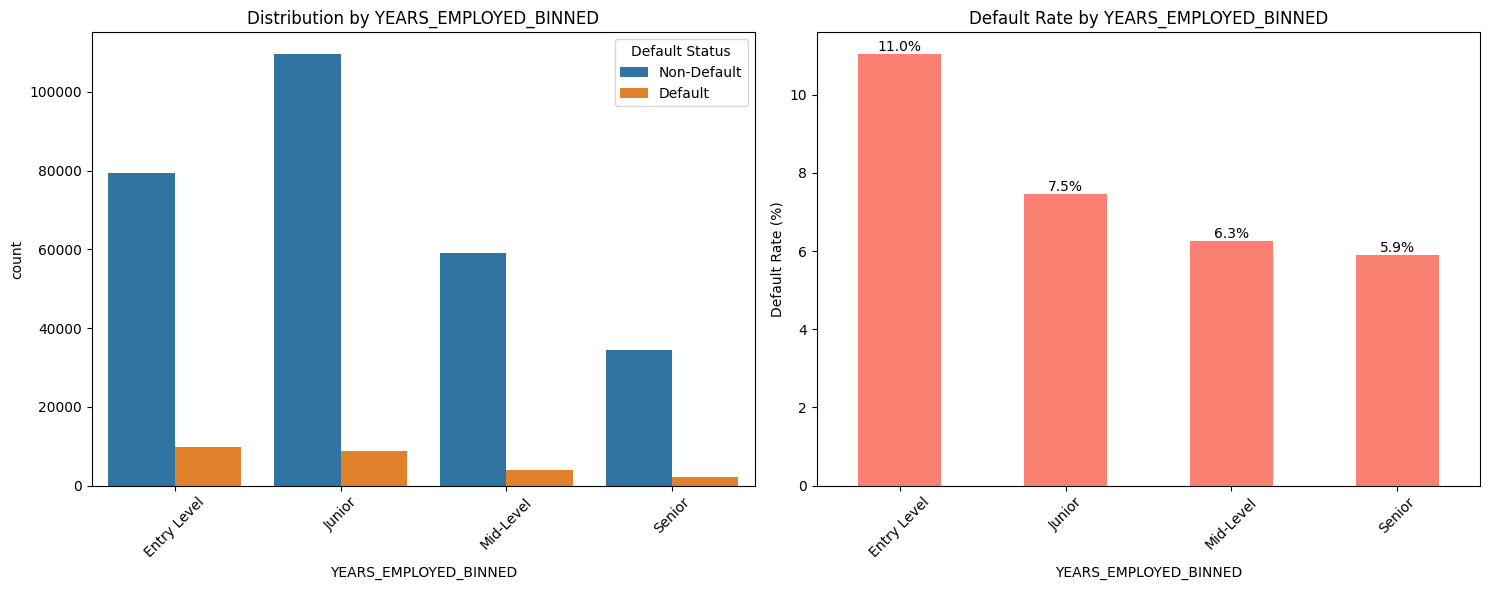


Statistics for YEARS_EMPLOYED_BINNED:

Distribution and Default Rates:
                        Count  Default_Rate
YEARS_EMPLOYED_BINNED                      
Entry Level             89393         11.04
Junior                 118519          7.47
Mid-Level               63052          6.26
Senior                  36547          5.91

Risk Analysis:
Overall Default Rate: 8.07%

Risk Index (>1 means higher risk than average):
YEARS_EMPLOYED_BINNED
Entry Level    1.37
Junior         0.93
Mid-Level      0.78
Senior         0.73
Name: Risk_Index, dtype: float64

Analyzing AGE_BINNED


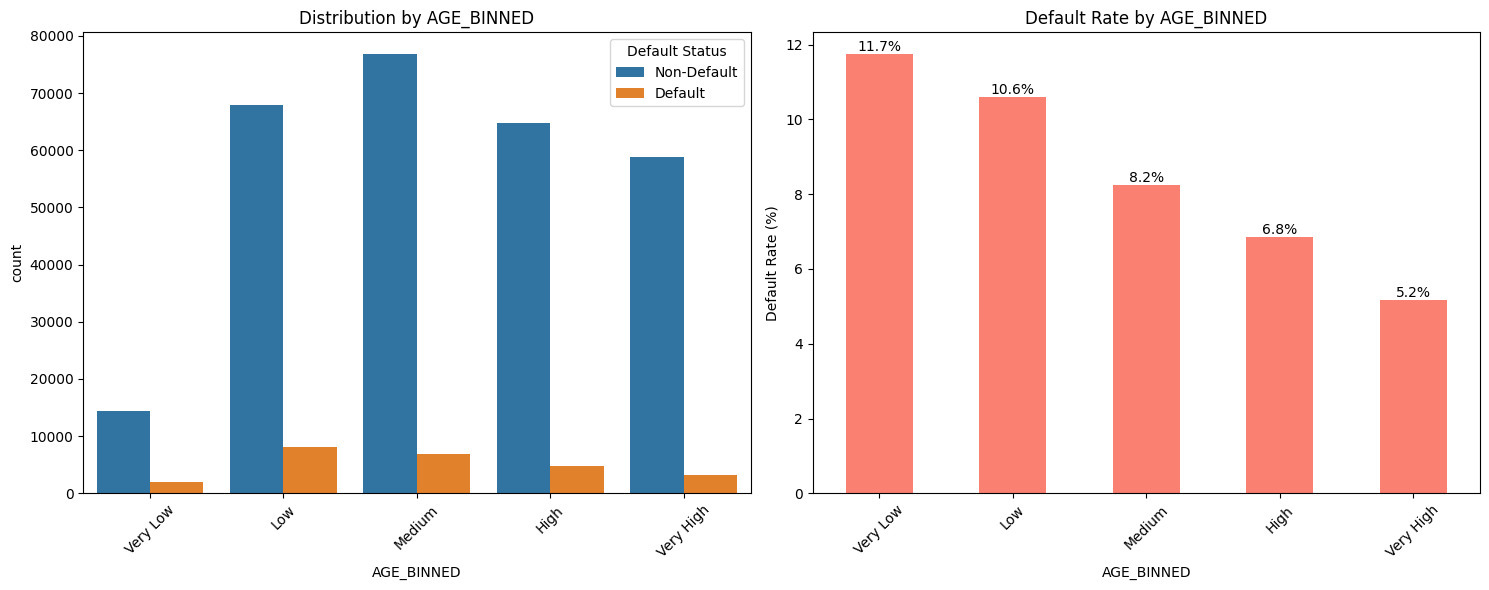


Statistics for AGE_BINNED:

Distribution and Default Rates:
            Count  Default_Rate
AGE_BINNED                     
Very Low    16318         11.74
Low         75925         10.59
Medium      83677          8.24
High        69501          6.85
Very High   62090          5.18

Risk Analysis:
Overall Default Rate: 8.07%

Risk Index (>1 means higher risk than average):
AGE_BINNED
Very Low     1.45
Low          1.31
Medium       1.02
High         0.85
Very High    0.64
Name: Risk_Index, dtype: float64

Analyzing AMT_INCOME_TOTAL_BINNED


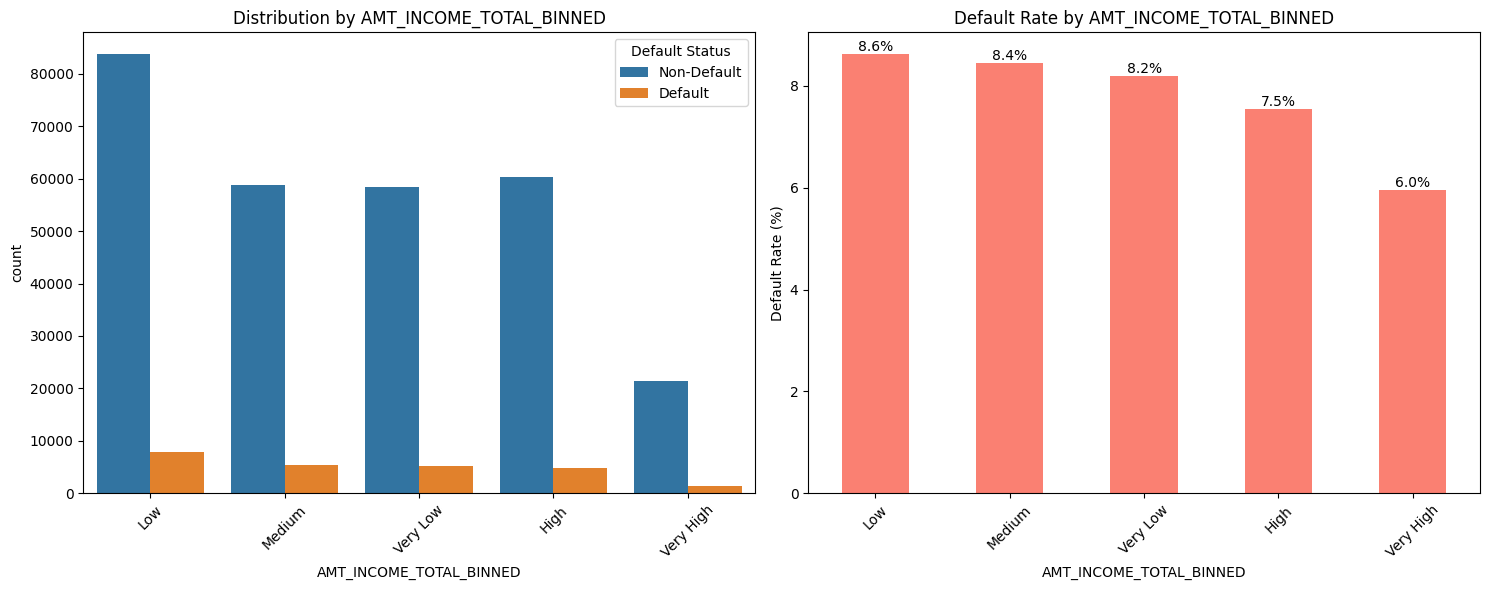


Statistics for AMT_INCOME_TOTAL_BINNED:

Distribution and Default Rates:
                         Count  Default_Rate
AMT_INCOME_TOTAL_BINNED                     
Low                      91591          8.62
Medium                   64307          8.45
Very Low                 63698          8.20
High                     65176          7.55
Very High                22739          5.95

Risk Analysis:
Overall Default Rate: 8.07%

Risk Index (>1 means higher risk than average):
AMT_INCOME_TOTAL_BINNED
Low          1.07
Medium       1.05
Very Low     1.02
High         0.94
Very High    0.74
Name: Risk_Index, dtype: float64

Analyzing AMT_CREDIT_BINNED


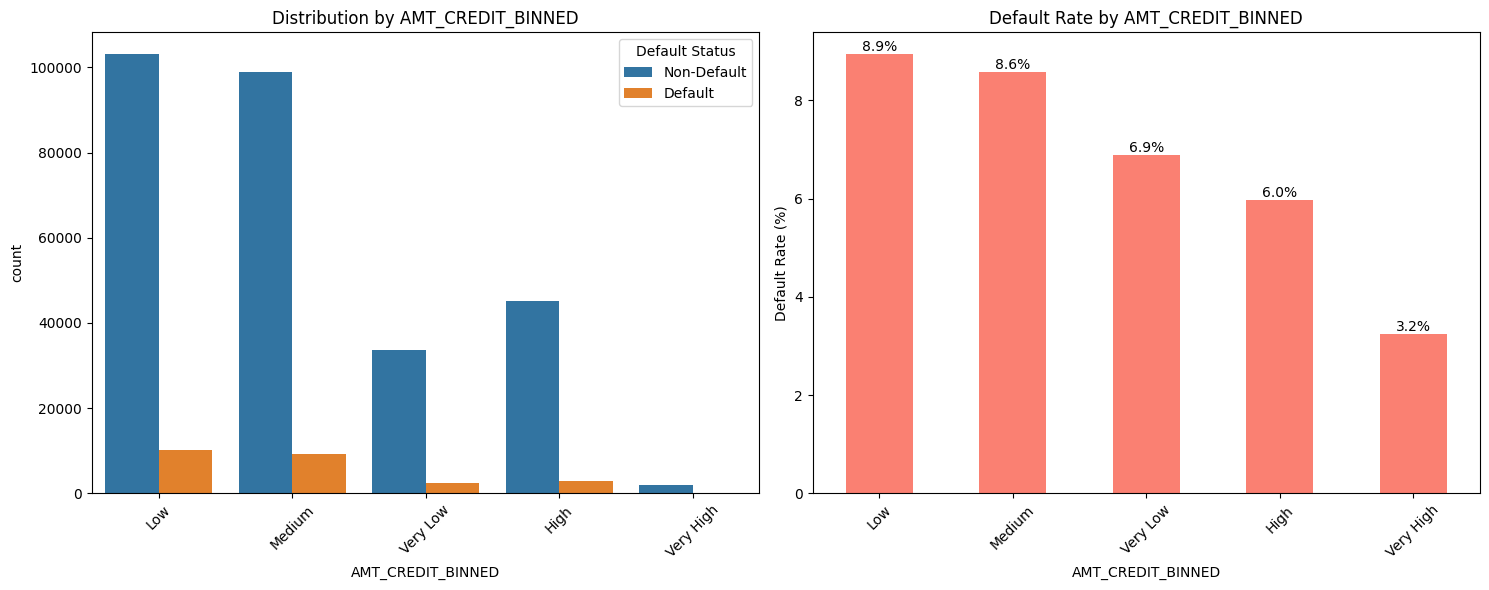


Statistics for AMT_CREDIT_BINNED:

Distribution and Default Rates:
                    Count  Default_Rate
AMT_CREDIT_BINNED                      
Low                113189          8.94
Medium             108193          8.58
Very Low            36144          6.89
High                47956          5.98
Very High            2029          3.25

Risk Analysis:
Overall Default Rate: 8.07%

Risk Index (>1 means higher risk than average):
AMT_CREDIT_BINNED
Low          1.11
Medium       1.06
Very Low     0.85
High         0.74
Very High    0.40
Name: Risk_Index, dtype: float64

Analyzing AMT_ANNUITY_BINNED


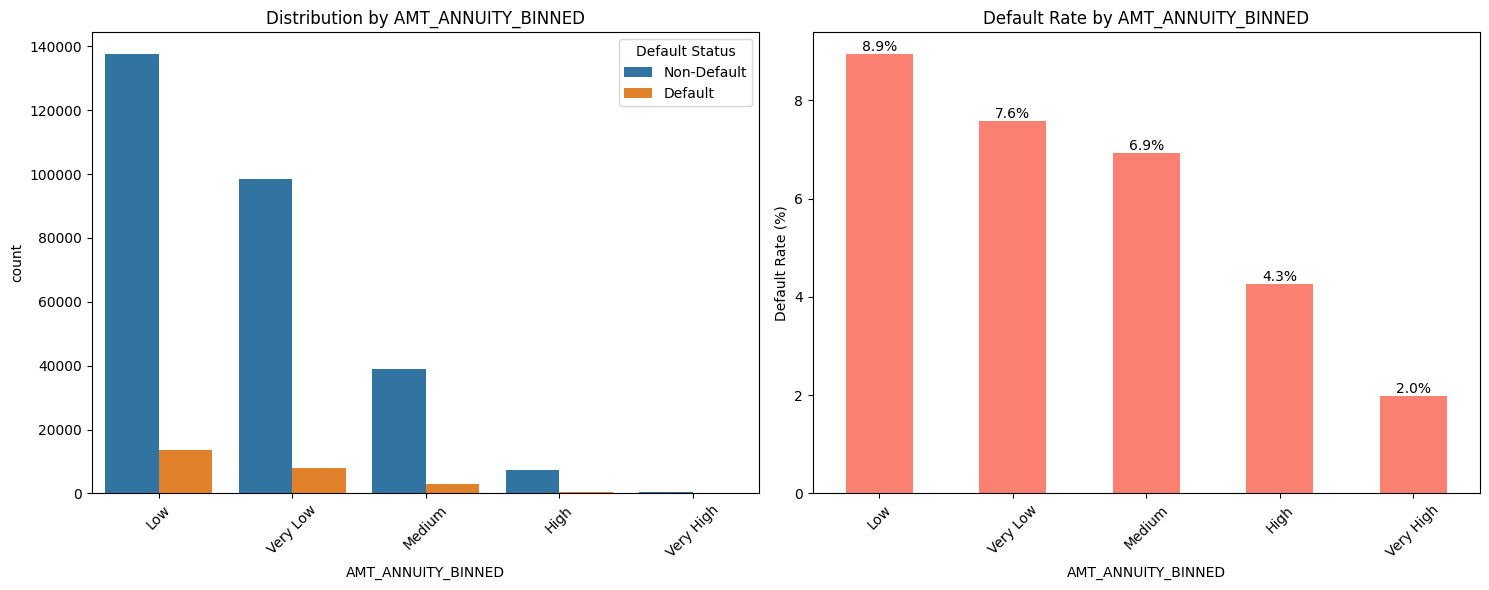


Statistics for AMT_ANNUITY_BINNED:

Distribution and Default Rates:
                     Count  Default_Rate
AMT_ANNUITY_BINNED                      
Low                 151040          8.94
Very Low            106505          7.59
Medium               41834          6.92
High                  7627          4.26
Very High              505          1.98

Risk Analysis:
Overall Default Rate: 8.07%

Risk Index (>1 means higher risk than average):
AMT_ANNUITY_BINNED
Low          1.11
Very Low     0.94
Medium       0.86
High         0.53
Very High    0.25
Name: Risk_Index, dtype: float64

Analyzing AMT_GOODS_PRICE_BINNED


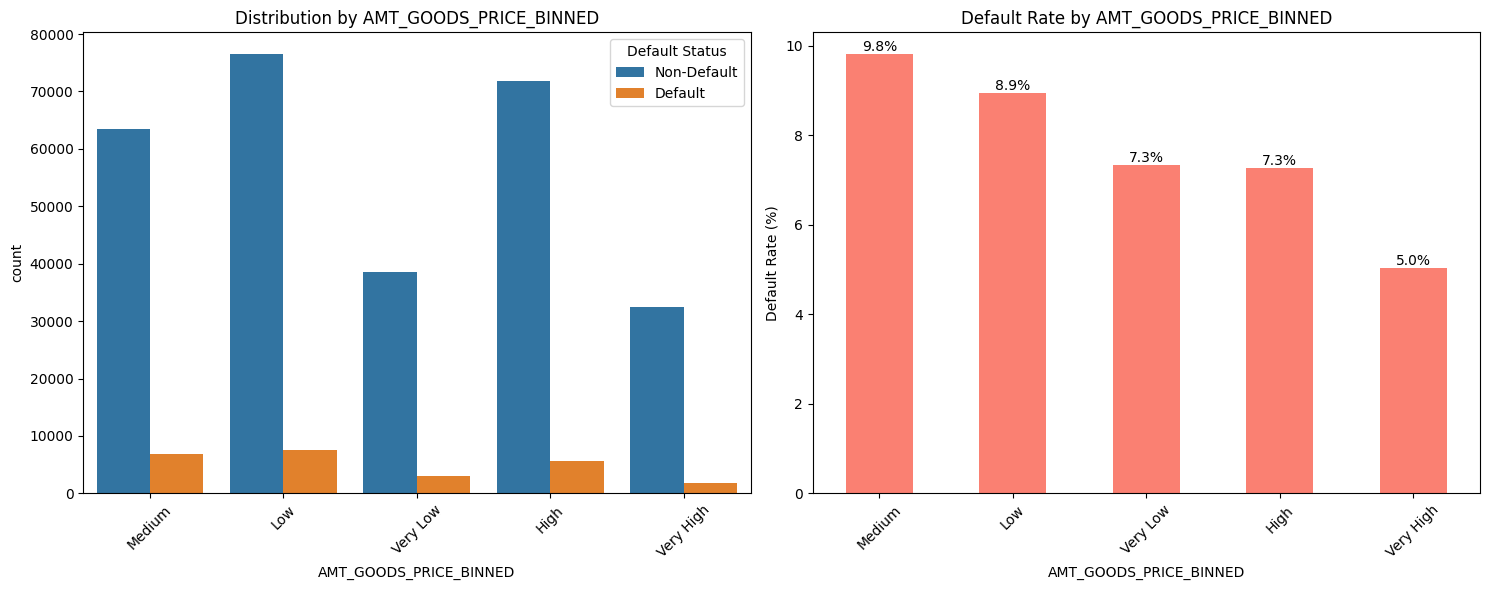


Statistics for AMT_GOODS_PRICE_BINNED:

Distribution and Default Rates:
                        Count  Default_Rate
AMT_GOODS_PRICE_BINNED                     
Medium                  70368          9.81
Low                     83980          8.95
Very Low                41665          7.34
High                    77379          7.28
Very High               34119          5.04

Risk Analysis:
Overall Default Rate: 8.07%

Risk Index (>1 means higher risk than average):
AMT_GOODS_PRICE_BINNED
Medium       1.22
Low          1.11
Very Low     0.91
High         0.90
Very High    0.62
Name: Risk_Index, dtype: float64

Analyzing EXT_SOURCE_2_BINNED


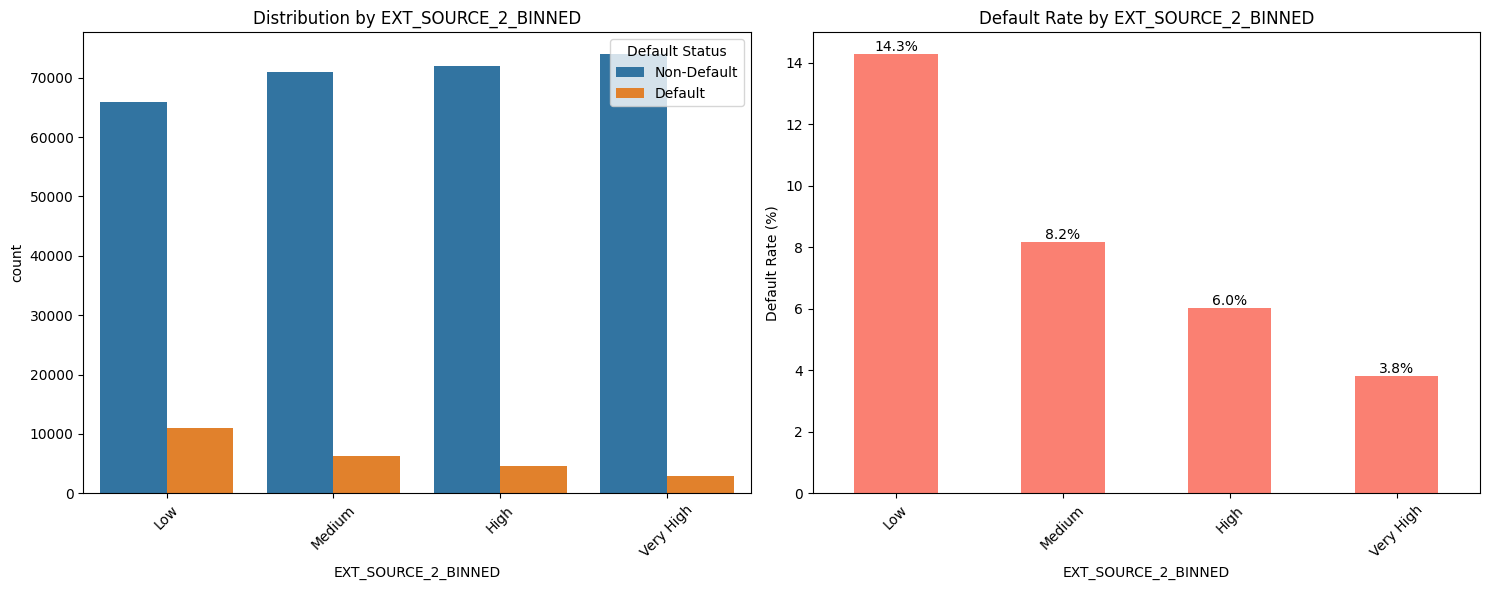


Statistics for EXT_SOURCE_2_BINNED:

Distribution and Default Rates:
                     Count  Default_Rate
EXT_SOURCE_2_BINNED                     
Low                  76879         14.28
Medium               77207          8.18
High                 76548          6.02
Very High            76877          3.81

Risk Analysis:
Overall Default Rate: 8.07%

Risk Index (>1 means higher risk than average):
EXT_SOURCE_2_BINNED
Low          1.77
Medium       1.01
High         0.75
Very High    0.47
Name: Risk_Index, dtype: float64

Analyzing EXT_SOURCE_3_BINNED


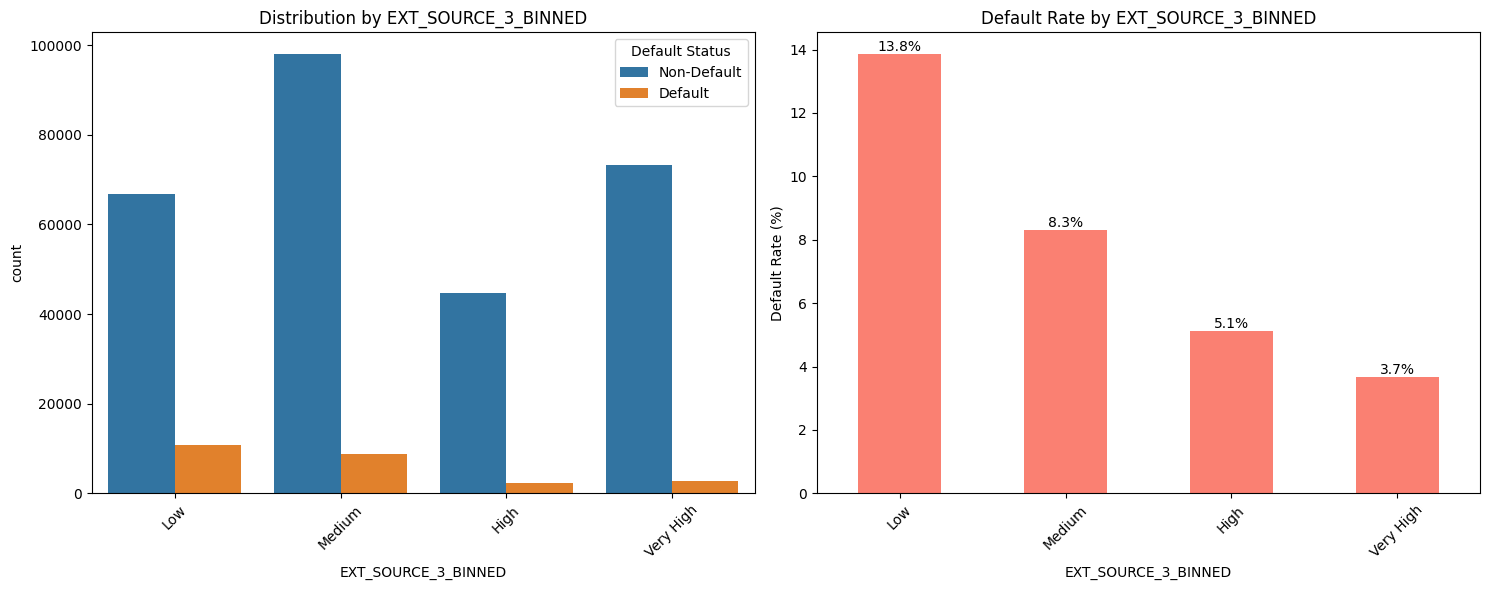


Statistics for EXT_SOURCE_3_BINNED:

Distribution and Default Rates:
                      Count  Default_Rate
EXT_SOURCE_3_BINNED                      
Low                   77497         13.85
Medium               106845          8.31
High                  47086          5.12
Very High             76083          3.67

Risk Analysis:
Overall Default Rate: 8.07%

Risk Index (>1 means higher risk than average):
EXT_SOURCE_3_BINNED
Low          1.72
Medium       1.03
High         0.63
Very High    0.45
Name: Risk_Index, dtype: float64

Analyzing CREDIT_TO_INCOME_BINNED


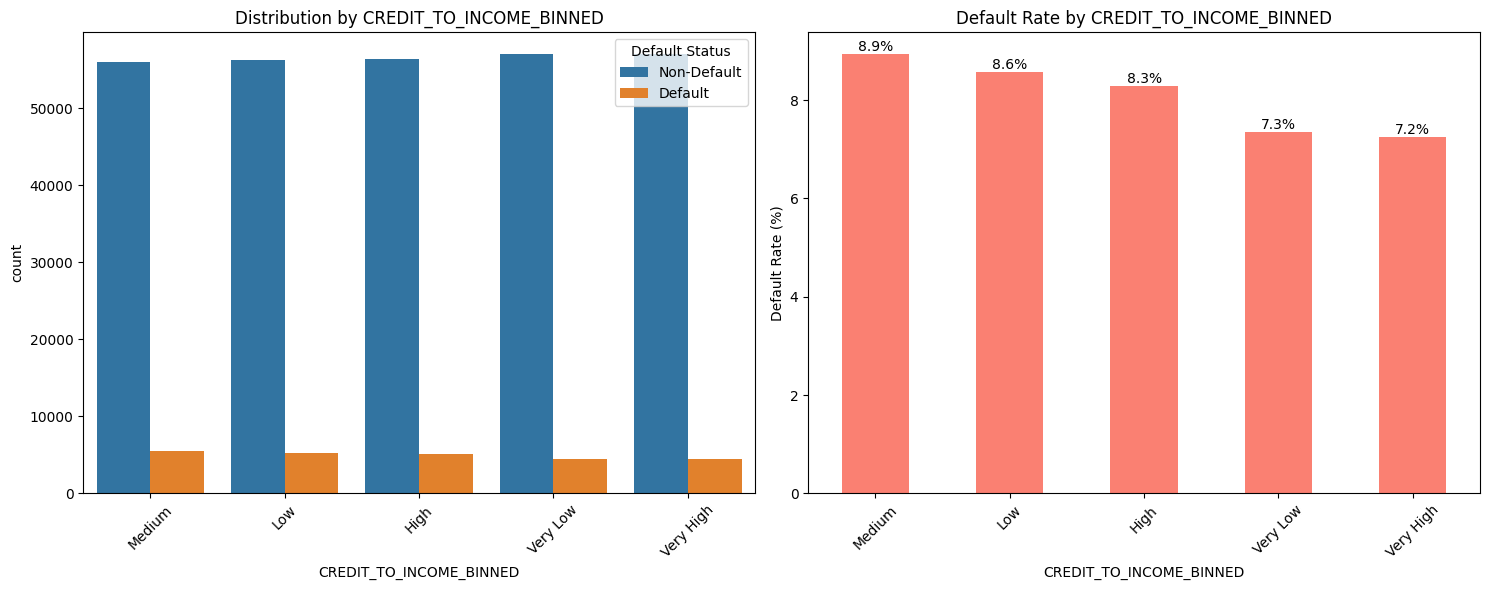


Statistics for CREDIT_TO_INCOME_BINNED:

Distribution and Default Rates:
                         Count  Default_Rate
CREDIT_TO_INCOME_BINNED                     
Medium                   61466          8.93
Low                      61502          8.57
High                     61505          8.28
Very Low                 61539          7.34
Very High                61499          7.25

Risk Analysis:
Overall Default Rate: 8.07%

Risk Index (>1 means higher risk than average):
CREDIT_TO_INCOME_BINNED
Medium       1.11
Low          1.06
High         1.03
Very Low     0.91
Very High    0.90
Name: Risk_Index, dtype: float64

Analyzing ANNUITY_TO_INCOME_BINNED


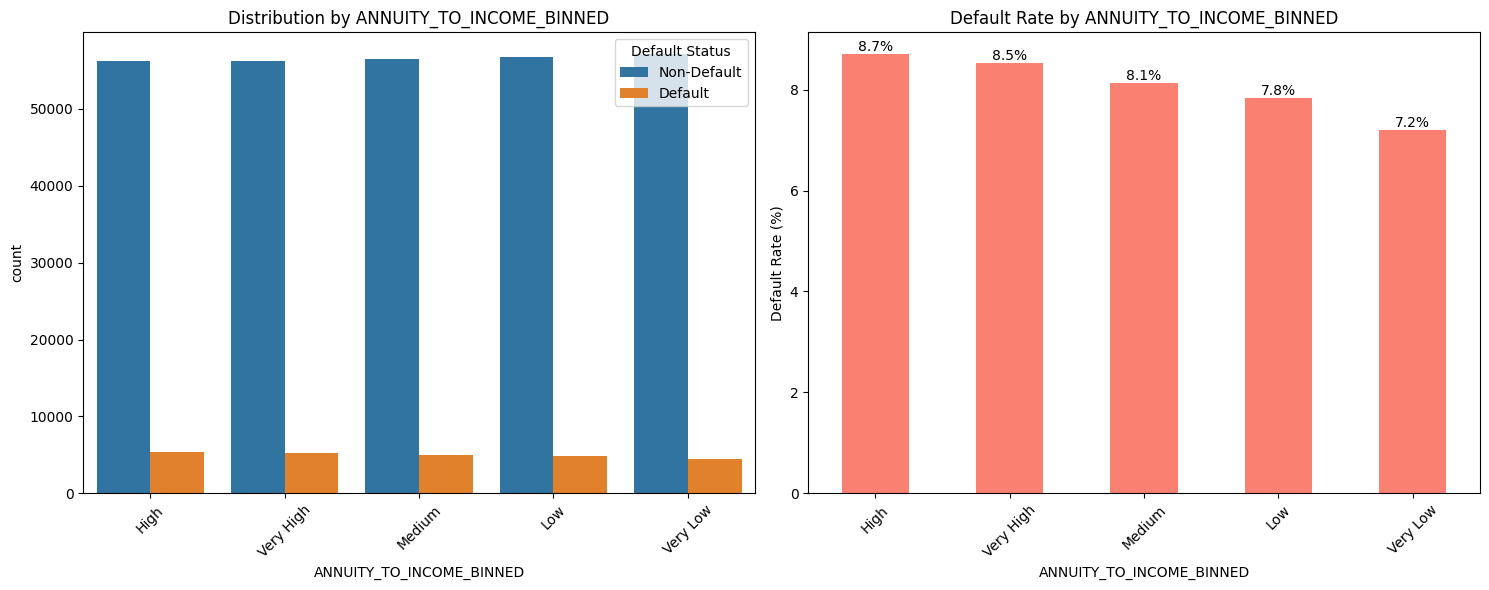


Statistics for ANNUITY_TO_INCOME_BINNED:

Distribution and Default Rates:
                          Count  Default_Rate
ANNUITY_TO_INCOME_BINNED                     
High                      61522          8.70
Very High                 61478          8.52
Medium                    61498          8.13
Low                       61509          7.83
Very Low                  61504          7.20

Risk Analysis:
Overall Default Rate: 8.07%

Risk Index (>1 means higher risk than average):
ANNUITY_TO_INCOME_BINNED
High         1.08
Very High    1.06
Medium       1.01
Low          0.97
Very Low     0.89
Name: Risk_Index, dtype: float64

Analyzing EMPLOYMENT_RATIO_BINNED


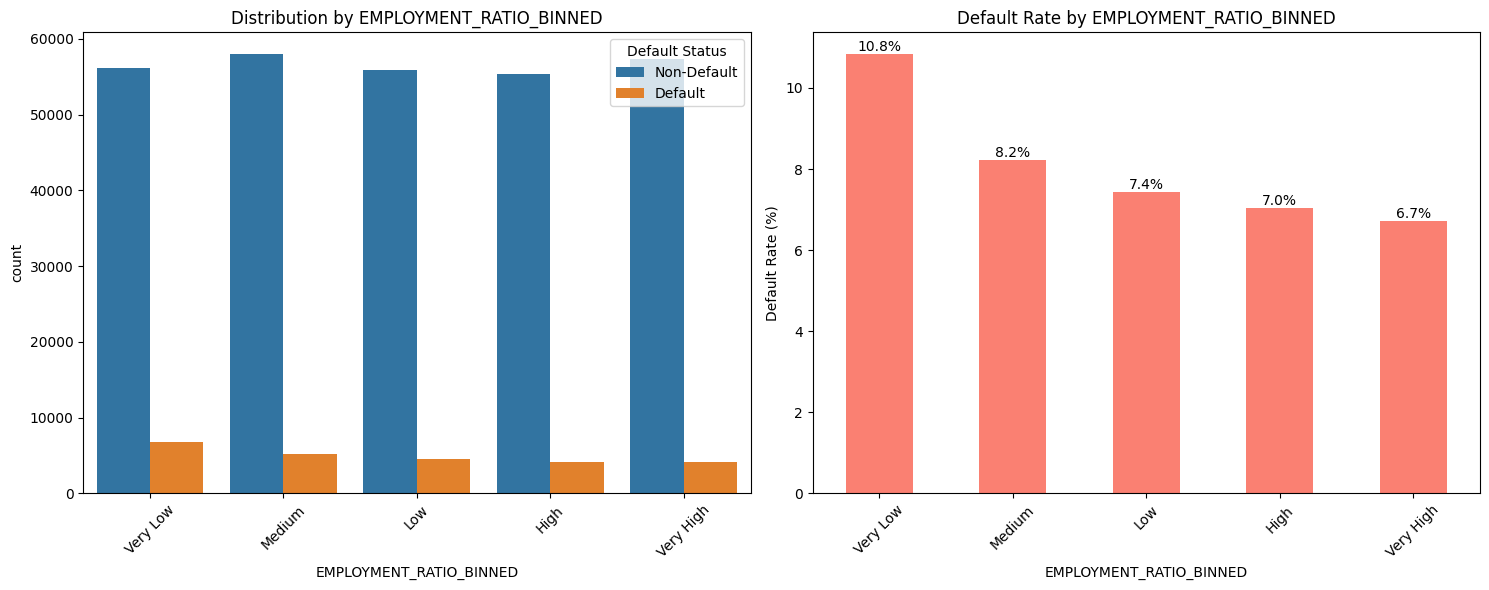


Statistics for EMPLOYMENT_RATIO_BINNED:

Distribution and Default Rates:
                         Count  Default_Rate
EMPLOYMENT_RATIO_BINNED                     
Very Low                 62923         10.83
Medium                   63147          8.22
Low                      60408          7.44
High                     59590          7.04
Very High                61443          6.71

Risk Analysis:
Overall Default Rate: 8.07%

Risk Index (>1 means higher risk than average):
EMPLOYMENT_RATIO_BINNED
Very Low     1.34
Medium       1.02
Low          0.92
High         0.87
Very High    0.83
Name: Risk_Index, dtype: float64


In [24]:
#Binned Features Analysis
eda.analyze_binned_features()

## Correlation Analysis
### Steps:
1. Calculate correlations for numerical features, segmented by `TARGET`.
2. Identify the top 10 correlations for defaulters and non-defaulters.
3. Compare patterns between the two segments.


## **Key Insights:**
### **Defaulters:**
- **Top Correlations:**
  - `OBS_30_CNT_SOCIAL_CIRCLE` & `OBS_60_CNT_SOCIAL_CIRCLE`: 0.998
  - `AMT_CREDIT` & `AMT_GOODS_PRICE`: 0.982
  - `AMT_INCOME_TOTAL` & `INCOME_PER_PERSON`: 0.976
  - `PREV_AMT_CREDIT_MEAN` & `PREV_AMT_APPLICATION_MEAN`: 0.975
  - `CNT_CHILDREN` & `CHILDREN_RATIO`: 0.934
- **Patterns:**
  - Strong correlations in credit-related variables and social circle observations.

### **Non-Defaulters:**
- **Top Correlations:**
  - `OBS_30_CNT_SOCIAL_CIRCLE` & `OBS_60_CNT_SOCIAL_CIRCLE`: 0.998
  - `AMT_CREDIT` & `AMT_GOODS_PRICE`: 0.987
  - `PREV_AMT_CREDIT_MEAN` & `PREV_AMT_APPLICATION_MEAN`: 0.977
  - `YEARS_EMPLOYED` & `EMPLOYMENT_RATIO`: 0.952
  - `CNT_CHILDREN` & `CHILDREN_RATIO`: 0.952
- **Patterns:**
  - Similar trends in credit and employment-related correlations.

## **Recommendations:**
- Use highly correlated variables for dimensionality reduction to avoid redundancy in modeling.
- Explore distinct patterns between defaulters and non-defaulters for targeted risk prediction.
- Prioritize credit and social circle features for predictive analysis due to their consistent strong correlations.



=== Correlation Analysis ===


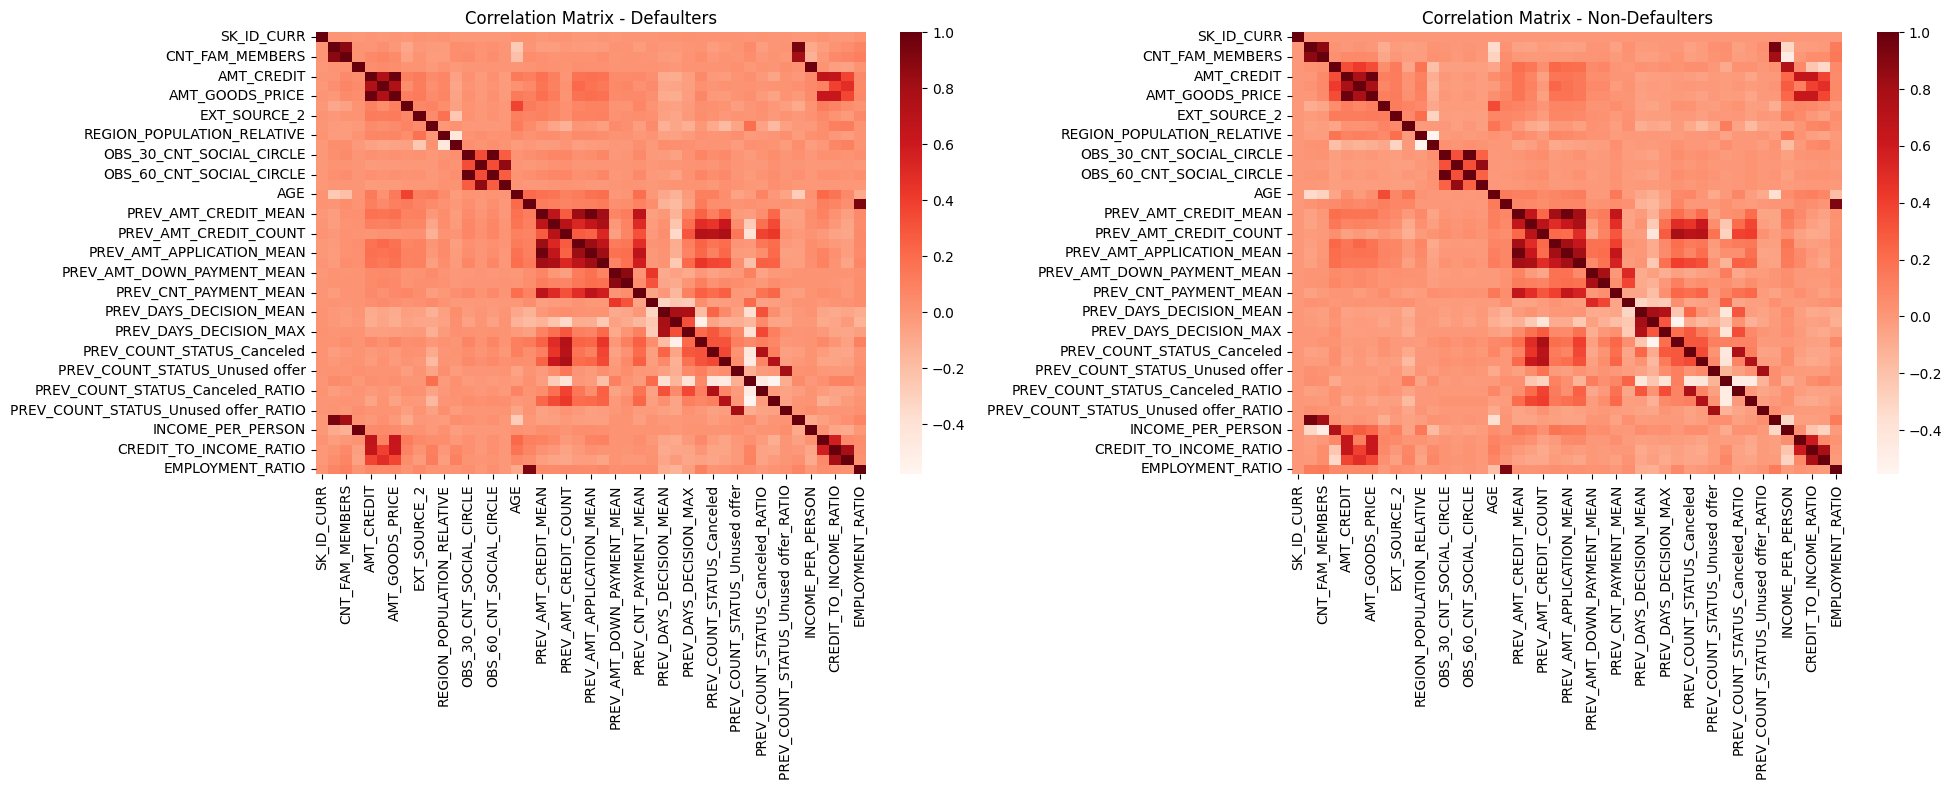


Top 10 Correlations - Defaulters:
                                              Features  Correlation
463  OBS_30_CNT_SOCIAL_CIRCLE & OBS_60_CNT_SOCIAL_C...     0.998270
171                       AMT_CREDIT & AMT_GOODS_PRICE     0.982783
165               AMT_INCOME_TOTAL & INCOME_PER_PERSON     0.981336
642   PREV_AMT_CREDIT_MEAN & PREV_AMT_APPLICATION_MEAN     0.975838
81                       CNT_CHILDREN & CHILDREN_RATIO     0.944642
638                  YEARS_EMPLOYED & EMPLOYMENT_RATIO     0.930250
44                      CNT_CHILDREN & CNT_FAM_MEMBERS     0.885484
780  PREV_AMT_DOWN_PAYMENT_MEAN & PREV_AMT_DOWN_PAY...     0.882500
495  DEF_30_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_C...     0.869016
641       PREV_AMT_CREDIT_MEAN & PREV_AMT_ANNUITY_MEAN     0.828992

Top 10 Correlations - Non-Defaulters:
                                              Features  Correlation
463  OBS_30_CNT_SOCIAL_CIRCLE & OBS_60_CNT_SOCIAL_C...     0.998510
171                       AMT_CREDIT & AMT

In [25]:
# Analyze correlations
eda.analyze_correlations()

### **Conclusion: Insights from All Analyses**

1. **Credit and Income-Related Features:**
   - High correlations between `AMT_CREDIT`, `AMT_GOODS_PRICE`, and `AMT_INCOME_TOTAL` suggest redundancy in these features.
   - Defaulters generally show higher default rates in lower credit and income bins, indicating financial stress.

2. **Employment and Annuity Trends:**
   - `YEARS_EMPLOYED` and `ANNUITY_TO_INCOME` ratios show a consistent trend: lower bins (less experience or higher annuity burdens) are associated with higher risks.
   - Employment stability (`EMPLOYMENT_RATIO`) shows a significant relationship with default rates, with "Very Low" stability being most risky.

3. **Age and Family Structure:**
   - Younger individuals (lower `AGE` bins) and those with more dependents (`CNT_FAM_MEMBERS`) exhibit higher default risks.
   - Borrowers in the "Very High" age bins (older individuals) and smaller families are lower risk.

4. **External Sources (EXT_SOURCE_2 & EXT_SOURCE_3):**
   - These scores are strong predictors of risk. Lower external source scores are associated with much higher default rates, reflecting poor financial health or external risk evaluation.

5. **Credit Ratios:**
   - Ratios such as `CREDIT_TO_INCOME` and `ANNUITY_TO_INCOME` are effective at segmenting risk:
     - Higher ratios (indicating more financial burden) show higher default rates.
     - These ratios should be prioritized for predictive models.

6. **Behavioral Patterns (Social Circles):**
   - Features like `OBS_30_CNT_SOCIAL_CIRCLE` and `OBS_60_CNT_SOCIAL_CIRCLE` have strong correlations and can provide insights into default behavior. Larger social circles may indicate potential financial dependencies.

7. **Key Risk Segments Identified:**
   - **High-Risk Groups:**
     - Borrowers with low income, young age, limited employment, or higher credit/annuity burdens.
     - Low external source scores (EXT_SOURCE_2 & EXT_SOURCE_3).
   - **Low-Risk Groups:**
     - Borrowers in higher income or credit bins, older age, and stable employment.

### **Actionable Recommendations:**
1. **Focus on Key Predictors:**
   - Include features like external source scores, credit ratios, age, and employment stability in risk modeling.
   - Eliminate redundant variables (e.g., highly correlated credit-related features).

2. **Enhance Risk-Based Segmentation:**
   - Use binned analysis to develop risk categories for targeted interventions or differentiated loan offerings.
   - Monitor high-risk groups (e.g., low external scores, low income) for early signs of financial distress.

3. **Dimensionality Reduction:**
   - Leverage correlation matrices to reduce feature redundancy, improving model efficiency.

4. **Behavior-Based Insights:**
   - Social circle size and observed defaults in similar groups can offer additional behavioral risk metrics.

**Insights in Business Terms**

**Key Drivers of Default:**
Lower income, higher credit amount, and larger family sizes are strongly associated with payment difficulties.
Younger individuals showed a higher likelihood of defaulting.

**Impact of Imbalance:**
Models or policies need to address the bias caused by data imbalance, ensuring fairness in predictions.